# Table des matières

### EXPLORATION DES DONNEES

* [Etape 1 - Exploration des données](#chapter1)
    * [Sources de données](#section_1_1)
      * [Source de données n°1 : Dataset Kaggle](#section_1_1_1)    
      * [Source de données n°2 : Datasets Webrobots](#section_1_1_2)  
    * [Processing](#section_1_2)
        * [Analyse et suppression des doublons](#section_1_2_1)        
        * [Ajout de nouvelles variables temporelles](#section_1_2_2)   
        * [Ajout des nouvelles variables 'spotlight' et 'urls'](#section_1_2_3)   
        * [Traitement des valeurs manquantes](#section_1_2_4)   
        * [Paramètres d'affichage des éléments de Data Visualisation](#section_1_2_5)       
    * [Analyse univariee](#section_1_3)
        * [Variable Statut (status)](#section_1_3_1)
        * [Variable Objectif (goal_usd)](#section_1_3_2)
        * [Variable Catégorie (main_category)](#section_1_3_3)
        * [Variable Sous-catégorie (sub_category)](#section_1_3_4)
        * [Variable Année (launched_year)](#section_1_3_5)      
        * [Variable Mois (launched_month)](#section_1_3_6)     
        * [Variable Durée (duration)](#section_1_3_7)      
        * [Variable Slogan (blurb)](#section_1_3_8) 
        * [Variable Longueur slogan (blurb_length)](#section_1_3_9) 
        * [Variable Pays (country)](#section_1_3_10)    
        * [Variable Spotlight ('spotlight')](#section_1_3_11)


# Etape 1 - Exploration des données <a class="anchor" id="chapter1"></a>

Dans cette étape, nous allons : 
- charger les jeux de données utiles à notre étude,
- analyser et supprimer les doublons,
- chercher et traiter les éventuelles valeurs manquantes,
- introduire de nouvelles variables utiles dans le dataset.
        

In [103]:
#Import de toutes les biliothèques nécesssaires à notre étude

import pandas as pd
import numpy as np
from datetime import datetime
import math
import glob

#Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Webscraping
import json
import requests
from bs4 import BeautifulSoup

#Text mining
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize# Passing the string text into word tokenize for breaking the sentences
from nltk.corpus import stopwords
from nltk.probability import FreqDist

#Machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from  sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\somal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Sources de données<a class="anchor" id="section_1_1"></a>
Pour notre étude, nous disposons de plusieurs datasets : l'un disponible sur le site **Kaggle**, l'autre sur le site **Webrobots.**<br>
Nous utiliserons en grande partie le dataset provenant du site Kaggle, et nous exploiterons également certaines données pertinentes provenant du dataset provenant du site Webrobots.

### Source de données n°1 : Dataset Kaggle<a class="anchor" id="section_1_1_1"></a>
Nous commençons par charger le jeu de données fourni par le site Kaggle (https://www.kaggle.com/yashkantharia/kickstarter-campaigns-dataset-20) dans un DataFrame appelé **df**.<br>
Ce dataframe recense les **campagnes de financement** lancées via la plate-forme américaine **Kickstarter** entre 2009 et 2020.

In [104]:
#Chargement du fichier csv et création du dataframe appelé df

path = '$PATH'
file = 'Kaggle_Kickstarter_DataSet.csv'

df=pd.read_csv(path+file, index_col=0, encoding='UTF-8', decimal=".")

df.head(3)

,id,name,currency,launched_at,backers_count,blurb,country,deadline,slug,status,usd_pledged,sub_category,main_category,creator_id,blurb_length,goal_usd,city,duration
0,1714728788,Urban Farm Kits: Our Solution to City Farming,CAD,2018-02-10 22:47:52,16,"Earn $1,000 - $20,000+ by transforming idle re...",CA,2018-04-11 21:47:52,urban-farm-kits-our-solution-to-city-farming,failed,577.902078,food,Farms,41046209,122,785.82065,Victoria,60.0
1,1639965256,Reflections on the LHC Safety Report,USD,2014-11-21 10:42:26,7,"Need Peer Review, Open Source style",US,2014-12-15 10:42:26,reflections-on-the-lhc-safety-report-review-an...,successful,211.000000,publishing,Academic,1877377173,35,93.00000,San Diego,24.0
2,1582062943,Ultra-Custom Chocolate Bars,USD,2020-10-19 05:26:59,99,Ultra-customized bean to bar chocolate. Any fl...,US,2020-11-18 05:26:59,ultra-custom-chocolate-bars-0,successful,4697.000000,food,Small Batch,205122366,122,1500.00000,Philadelphia,30.0


In [105]:
#Affichage des informations principales de df

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217245 entries, 0 to 217252
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             217245 non-null  int64  
 1   name           217245 non-null  object 
 2   currency       217245 non-null  object 
 3   launched_at    217245 non-null  object 
 4   backers_count  217245 non-null  int64  
 5   blurb          217245 non-null  object 
 6   country        217245 non-null  object 
 7   deadline       217245 non-null  object 
 8   slug           217245 non-null  object 
 9   status         217245 non-null  object 
 10  usd_pledged    217245 non-null  float64
 11  sub_category   217245 non-null  object 
 12  main_category  217245 non-null  object 
 13  creator_id     217245 non-null  int64  
 14  blurb_length   217245 non-null  int64  
 15  goal_usd       217245 non-null  float64
 16  city           217245 non-null  object 
 17  duration       217245 non-nul

In [106]:
#Affichage des variables de df

df.columns

Index(['id', 'name', 'currency', 'launched_at', 'backers_count', 'blurb',
       'country', 'deadline', 'slug', 'status', 'usd_pledged', 'sub_category',
       'main_category', 'creator_id', 'blurb_length', 'goal_usd', 'city',
       'duration'],
      dtype='object')

In [107]:
#Affichage des dimensions de df

df.shape

(217245, 18)

### Liste des variables

**A) <u>Variables Quantitatives :**</u>
 - 'blurb_length' : longueur du slogan (en nombre de lettres)
 - 'goal_usd' : objectif de la campagne de financement (en dollars)
 - 'duration' : durée de la campagne (en jours)

**B) <u>Variables Catégorielles :**</u>
- 'name'
- 'currency'
- 'launched_at' : 'launched_year', 'launched_month'
- 'blurb'
- 'country',
- 'city'
- 'deadline'
- 'slug'
- 'main_category'
- 'sub_category'
  
**C) <u>Variable Cible :**</u>
- 'status'

### Source de données n°2 : Datasets Webrobots<a class="anchor" id="section_1_1_2"></a>
Les jeux de données fournis par le site Webrobots (source : https://webrobots.io/kickstarter-datasets/) contiennent également des données intéressantes, que nous allons pouvoir ajouter à notre dataset d'étude (source Kaggle).<br> 
<br>
Nous chargeons les données du site Webrobots dans un DataFrame appelé **df_webrobots.**


In [108]:
#On charge le premier fichier csv appelé Kickstarter.csv 

path = '$PATH'
file = 'Kickstarter.csv'

df_webrobots = pd.read_csv(path+file,index_col=0, encoding='UTF-8',decimal=".")

In [109]:
#Affichage des informations relatives à ce premier dataframe

df_webrobots.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3664 entries, 28 to 43
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   blurb                     3664 non-null   object 
 1   category                  3664 non-null   object 
 2   converted_pledged_amount  3664 non-null   int64  
 3   country                   3664 non-null   object 
 4   country_displayable_name  3664 non-null   object 
 5   created_at                3664 non-null   int64  
 6   creator                   3664 non-null   object 
 7   currency                  3664 non-null   object 
 8   currency_symbol           3664 non-null   object 
 9   currency_trailing_code    3664 non-null   bool   
 10  current_currency          3664 non-null   object 
 11  deadline                  3664 non-null   int64  
 12  disable_communication     3664 non-null   bool   
 13  friends                   0 non-null      float64
 14  fx_rate  

In [110]:
#On charge les fichiers csv dont le nom est de type Kickstarter'+'0xx' en utilisant la library glob et on les fusionne avec df_webrobots

all_files = glob.glob(path + "Kickstarter0*.csv")

for file in all_files:
    df_temp = pd.read_csv(file, encoding='UTF-8',decimal=".")
    df_webrobots=pd.concat([df_webrobots,df_temp])

In [111]:
#Affichage des dimensions de df_webrobots

df_webrobots.shape

(224457, 39)

In [112]:
#Affichage des informations principales de df_webrobots

df_webrobots.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224457 entries, 28 to 1163
Data columns (total 39 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   blurb                     224449 non-null  object 
 1   category                  224457 non-null  object 
 2   converted_pledged_amount  224457 non-null  int64  
 3   country                   224457 non-null  object 
 4   country_displayable_name  224457 non-null  object 
 5   created_at                224457 non-null  int64  
 6   creator                   224457 non-null  object 
 7   currency                  224457 non-null  object 
 8   currency_symbol           224457 non-null  object 
 9   currency_trailing_code    224457 non-null  bool   
 10  current_currency          224457 non-null  object 
 11  deadline                  224457 non-null  int64  
 12  disable_communication     224457 non-null  bool   
 13  friends                   72 non-null      ob

In [113]:
#On supprime les doublons dans df_webrobots

df_webrobots = df_webrobots.drop_duplicates(subset=['id'], keep='first')

#Affichage de la taille de df_webrobots

print(df_webrobots.shape)

(196712, 39)


In [114]:
#Affichage des premières lignes de df_webrobots

df_webrobots.head(3)

,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,currency_trailing_code,...,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_exchange_rate,usd_pledged,usd_type,backers_count
28,"For our 2nd full length album, we have decided...","{""id"":40,""name"":""Indie Rock"",""analytics_name"":...",1315,US,the United States,1380457620,"{""id"":1045564870,""name"":""Brody & The Busch Rd....",USD,$,True,...,True,False,successful,1399507237,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1.0,1315.0,international,NaN
19,Help me get these new songs mixed and mastered!,"{""id"":38,""name"":""Electronic Music"",""analytics_...",862,US,the United States,1471457593,"{""id"":601906188,""name"":""Jared Farrell"",""slug"":...",USD,$,True,...,False,False,failed,1474400808,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1.0,862.0,international,NaN
60,The Eroica Trio wants to commission a new trio...,"{""id"":36,""name"":""Classical Music"",""analytics_n...",12194,US,the United States,1361319424,"{""id"":413470524,""name"":""The Eroica Trio"",""is_r...",USD,$,True,...,True,False,successful,1383364741,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1.0,12194.0,international,NaN


In [115]:
#Affichage des variables de df_webrobots

df_webrobots.columns

Index(['blurb', 'category', 'converted_pledged_amount', 'country',
       'country_displayable_name', 'created_at', 'creator', 'currency',
       'currency_symbol', 'currency_trailing_code', 'current_currency',
       'deadline', 'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_exchange_rate', 'usd_pledged',
       'usd_type', 'backers_count'],
      dtype='object')

In [116]:
#On ne garde que les 3 variables 'id', 'spotlight' et 'urls' dans df_webrobots
#Celles-ci nous seront utiles ultérieurement

selected_var = ['id','spotlight', 'urls']
df_webrobots = df_webrobots[selected_var]

df_webrobots.head()

,id,spotlight,urls
28,189897203,True,"{""web"":{""project"":""https://www.kickstarter.com..."
19,888478499,False,"{""web"":{""project"":""https://www.kickstarter.com..."
60,1751991700,True,"{""web"":{""project"":""https://www.kickstarter.com..."
0,1840471726,False,"{""web"":{""project"":""https://www.kickstarter.com..."
0,10457111,False,"{""web"":{""project"":""https://www.kickstarter.com..."


## Processing <a class="anchor" id="section_1_2"></a>



#### Analyse et suppression des doublons <a class="anchor" id="section_1_2_1"></a>


In [117]:
#Retour sur le dataframe df
#On supprime les doublons (lignes strictement identiques) dans df
#On fait une copie du dataframe df

df = df.drop_duplicates().copy()

df.head(3)

,id,name,currency,launched_at,backers_count,blurb,country,deadline,slug,status,usd_pledged,sub_category,main_category,creator_id,blurb_length,goal_usd,city,duration
0,1714728788,Urban Farm Kits: Our Solution to City Farming,CAD,2018-02-10 22:47:52,16,"Earn $1,000 - $20,000+ by transforming idle re...",CA,2018-04-11 21:47:52,urban-farm-kits-our-solution-to-city-farming,failed,577.902078,food,Farms,41046209,122,785.82065,Victoria,60.0
1,1639965256,Reflections on the LHC Safety Report,USD,2014-11-21 10:42:26,7,"Need Peer Review, Open Source style",US,2014-12-15 10:42:26,reflections-on-the-lhc-safety-report-review-an...,successful,211.000000,publishing,Academic,1877377173,35,93.00000,San Diego,24.0
2,1582062943,Ultra-Custom Chocolate Bars,USD,2020-10-19 05:26:59,99,Ultra-customized bean to bar chocolate. Any fl...,US,2020-11-18 05:26:59,ultra-custom-chocolate-bars-0,successful,4697.000000,food,Small Batch,205122366,122,1500.00000,Philadelphia,30.0


In [118]:
#Dimensions de df

df.shape

(197718, 18)

In [119]:
#On cherche d'éventuels doublons restants ('id' en double) dans df

df['id'].duplicated().sum()

#Conclusion : après avoir supprimé les lignes strictement identiques dans df (avec méthode drop_duplicates), il semble 
#qu'il y ait encore 4830 lignes présentant des id identiques.

4830

In [120]:
#Identification des id en double dans df (avec la fonction groupby)

id_duplicates = df.groupby(['id']).agg(count=('id', 'count')).reset_index()
id_duplicates.loc[id_duplicates['count']>1]

#On observe ainsi qu'il y a encore 4830 id qui apparaissent EN DOUBLE dans df.
#Ceux-ci n'ont pas été supprimés lorsque la méthode drop_duplicates() a été appliquée à df.

#Cela signifie que dans df, il y a 4830 couples de lignes qui possèdent le même id, mais qui ne sont pas strictement 
#identiques (-> différence au niveau d’une variable du dataset).
#Pour chacun de ces couples d'id, nous allons donc vérifier où se situe la différence (c'est-à-dire dans quelle variable)

,id,count
12,59422,2
15,148828,2
104,990266,2
159,1624462,2
220,2385200,2
...,...,...
192446,2142005757,2
192529,2142990343,2
192775,2146135879,2
192808,2146568942,2


In [121]:
#On ajoute dans df une nouvelle colonne 'is_duplicate' pour identifier les campagnes avec un id en double

df['is_duplicate'] = df.duplicated(subset = 'id', keep=False)

print(df.shape)

df.head(3)

(197718, 19)


,id,name,currency,launched_at,backers_count,blurb,country,deadline,slug,status,usd_pledged,sub_category,main_category,creator_id,blurb_length,goal_usd,city,duration,is_duplicate
0,1714728788,Urban Farm Kits: Our Solution to City Farming,CAD,2018-02-10 22:47:52,16,"Earn $1,000 - $20,000+ by transforming idle re...",CA,2018-04-11 21:47:52,urban-farm-kits-our-solution-to-city-farming,failed,577.902078,food,Farms,41046209,122,785.82065,Victoria,60.0,False
1,1639965256,Reflections on the LHC Safety Report,USD,2014-11-21 10:42:26,7,"Need Peer Review, Open Source style",US,2014-12-15 10:42:26,reflections-on-the-lhc-safety-report-review-an...,successful,211.000000,publishing,Academic,1877377173,35,93.00000,San Diego,24.0,False
2,1582062943,Ultra-Custom Chocolate Bars,USD,2020-10-19 05:26:59,99,Ultra-customized bean to bar chocolate. Any fl...,US,2020-11-18 05:26:59,ultra-custom-chocolate-bars-0,successful,4697.000000,food,Small Batch,205122366,122,1500.00000,Philadelphia,30.0,False


In [122]:
#On extrait les id en double dans df et les ajoutons dans un nouveau dataframe appelé df_duplicates

df_duplicates = df.loc[df['is_duplicate'] == True]
df_duplicates = df_duplicates.sort_values(by=['id'])

print(df_duplicates.shape)

#Il y a 9660 lignes dans df_duplicates. Cela correspond aux 4830 id présents en double dans df.

(9660, 19)


In [123]:
#Pour chacun des couples d'id identiques, nous allons essayer de trouver OU se situe la différence (c'est-à-dire dans 
#quelle variable de df)

#On crée alors une fonction permettant - pour chaque couple d'id identiques - d'afficher le nom de la variable 
#qui diffère :

matched_id = {}

#On définit une fonction appelée 'compare_row' :
def compare_row(r1, r2, columns):
    for col in columns:
        if r1[col] != r2[col]:
            if not r1['id'] in matched_id:
                #print(col, r1['id'])
                matched_id[r1['id']] = col
            
#On applique la fonction 'compare_row' à df_duplicates :
for i in range(len(df_duplicates)):
    df_temp = df_duplicates.loc[df_duplicates['id'] == df_duplicates.iloc[i]['id']]
    if len(df_temp) > 1:
        compare_row(df_temp.iloc[0], df_temp.iloc[1], df_duplicates.columns.drop('id'))        

In [124]:
#On crée un dataframe appelé data à partir du dictionnaire matched_id

data = pd.DataFrame.from_dict(matched_id, orient='index', columns=['difference_type'])
data = data.reset_index()
data.rename(columns={"index":"id"}, inplace = True)

print(data.shape)

data.head(10)

(4830, 2)


,id,difference_type
0,59422,goal_usd
1,148828,usd_pledged
2,990266,goal_usd
3,1624462,goal_usd
4,2385200,goal_usd
5,3092643,goal_usd
6,3443026,goal_usd
7,4880617,goal_usd
8,4987103,goal_usd
9,5220455,goal_usd


In [125]:
#Affichage des modalités de la variable 'difference_type' dans data

data['difference_type'].value_counts()

goal_usd         4641
backers_count     139
usd_pledged        48
status              1
name                1
Name: difference_type, dtype: int64

In [126]:
#On souhaite ajouter la variable 'difference_type' dans df_duplicates

#Création de dataframes temporaires
data_goal_usd = data.loc[data['difference_type'] == 'goal_usd']
data_backers_count = data.loc[data['difference_type'] == 'backers_count']
data_usd_pledged = data.loc[data['difference_type'] == 'usd_pledged']
data_name = data.loc[data['difference_type'] == 'name']
data_status = data.loc[data['difference_type'] == 'status']

#Ajout de la variable 'difference_type' dans df_duplicates
df_duplicates['difference_type'] = "";                       

#On complète la variable 'difference_type' pour chaque id dans df_duplicates
for value in list(data_goal_usd['id']):
    df_duplicates.loc[df_duplicates['id'] == value, ['difference_type']] = 'goal_usd';
    
for value in list(data_backers_count['id']):
    df_duplicates.loc[df_duplicates['id'] == value, ['difference_type']] = 'backers_count';    

for value in list(data_usd_pledged['id']):
    df_duplicates.loc[df_duplicates['id'] == value, ['difference_type']] = 'usd_pledged';
    
for value in list(data_name['id']):
    df_duplicates.loc[df_duplicates['id'] == value, ['difference_type']] = 'name';    
    
for value in list(data_status['id']):
    df_duplicates.loc[df_duplicates['id'] == value, ['difference_type']] = 'status';

In [127]:
#Affichage et décompte des modalités de la variable 'difference_type' dans df_duplicates

df_duplicates['difference_type'].value_counts()

goal_usd         9282
backers_count     278
usd_pledged        96
name                2
status              2
Name: difference_type, dtype: int64

In [128]:
#On extrait et affiche les couples d'id de df_duplicates pour lesquels 'difference_type' = goal_usd

df_goal_usd = df_duplicates.loc[df_duplicates['difference_type'] == 'goal_usd']
selected_var = ['id', 'difference_type', 'goal_usd']
df_goal_usd = df_goal_usd[selected_var]

df_goal_usd.head(10)

,id,difference_type,goal_usd
164837,59422,goal_usd,338.508450
77617,59422,goal_usd,336.671317
155776,990266,goal_usd,2693.370540
213445,990266,goal_usd,2708.067600
196724,1624462,goal_usd,744.718590
93048,1624462,goal_usd,740.676898
79365,2385200,goal_usd,2020.027905
63901,2385200,goal_usd,2031.050700
50600,3092643,goal_usd,471.635448
39705,3092643,goal_usd,471.492390


In [129]:
#On extrait et affiche les couples d'id de df_duplicates pour lesquels 'difference_type' = backers_count

df_backers_count = df_duplicates.loc[df_duplicates['difference_type'] == 'backers_count']
selected_var2 = ['id', 'difference_type', 'backers_count']
df_backers_count = df_backers_count[selected_var2]

df_backers_count.head(10)

,id,difference_type,backers_count
131944,20038682,backers_count,725
184916,20038682,backers_count,724
167935,21721840,backers_count,1757
157782,21721840,backers_count,1758
113494,23258344,backers_count,21
156988,23258344,backers_count,20
30943,25238492,backers_count,288
104977,25238492,backers_count,286
17113,69120296,backers_count,23
161272,69120296,backers_count,24


In [130]:
#On extrait et affiche les couples d'id de df_duplicates pour lesquels 'difference_type' = usd_pledged

df_usd_pledged = df_duplicates.loc[df_duplicates['difference_type'] == 'usd_pledged']
selected_var3 = ['id', 'difference_type', 'usd_pledged']
df_usd_pledged = df_usd_pledged[selected_var3]

df_usd_pledged.head(10)

,id,difference_type,usd_pledged
150380,148828,usd_pledged,1.013647
38190,148828,usd_pledged,1.010069
30214,213641059,usd_pledged,305256.643903
23444,213641059,usd_pledged,306109.597024
75912,227923017,usd_pledged,25871.000000
216826,227923017,usd_pledged,25836.000000
105398,230943072,usd_pledged,101.695596
125556,230943072,usd_pledged,102.359721
212987,292857568,usd_pledged,54504.000000
189796,292857568,usd_pledged,54529.000000


In [131]:
#On extrait et affiche les couples d'id de df_duplicates pour lesquels 'difference_type' = name

df_name = df_duplicates.loc[df_duplicates['difference_type'] == 'name']
selected_var4 = ['id', 'difference_type', 'name']
df_name = df_name[selected_var4]

df_name.head()

,id,difference_type,name
205660,1151432421,name,Cute Ghost Lovers Enamel Pins & Stationeries
108438,1151432421,name,Little Ghost Lovers Enamel Pins & Stationeries


In [132]:
#On extrait et affiche les couples d'id de df_duplicates pour lesquels 'difference_type' = status

df_status = df_duplicates.loc[df_duplicates['difference_type'] == 'status']
selected_var5 = ['id', 'difference_type', 'status']
df_status = df_status[selected_var5]

df_status.head()

,id,difference_type,status
56144,1568760747,status,live
175656,1568760747,status,successful


<u>**Conclusion (concernant les doublons dans df) :**</u>

Dans df, il y a **4830 couples d'id (soit 9660 campagnes)** qui sont quasiment identiques, deux à deux :
* 4641 couples d'id (soit 9282 campagnes) où une différence se trouve au niveau de la variable **'goal_usd'**,
* 139 couples d'id  (soit 278 campagnes) où une différence se trouve au niveau de la variable **'backers_count'**,
* 48 couples d'id  (soit 96 campagnes) où une différence se trouve au niveau de la variable **'usd_pledged'**,
* 1 couple d'id (soit 2 campagnes) où une différence se trouve au niveau de la variable **'status'**,
* 1 couple d'id (soit 2 campagnes) où une différence se trouve au niveau de la variable **'name'**.<br> 

Ainsi, la plupart du temps quand un id est présent **deux fois dans le dataset**, c'est parce qu'il existe une seconde ligne 
qui diffère soit par la variable **'goal_usd'**, soit par la variable **'usd_pledged'**.<br>
Les différences observées au sein des couples d'id ne sont **pas jugées significatives (différence de quelques dollars seulement).**<br><br>
Dans les autres cas, les campagnes/id diffèrent par les variables suivantes : **'backers_count', 'status', 'name'.**
<br>Là encore, on observe que les différences **ne sont pas significatives.**

Pour chaque campagne qui apparait deux fois dans df, on décide alors de ne garder <u>**qu'une seule ligne**.</u><br>
Cela revient à faire <u>**une suppression des doublons sur la colonne 'id' dans df.**</u>


In [133]:
#On reprend df et on supprime les doublons sur la colonne 'id'

df = df.drop_duplicates(subset=['id'], keep='last').copy()

print(df.shape)

df.head(3)

(192888, 19)


,id,name,currency,launched_at,backers_count,blurb,country,deadline,slug,status,usd_pledged,sub_category,main_category,creator_id,blurb_length,goal_usd,city,duration,is_duplicate
0,1714728788,Urban Farm Kits: Our Solution to City Farming,CAD,2018-02-10 22:47:52,16,"Earn $1,000 - $20,000+ by transforming idle re...",CA,2018-04-11 21:47:52,urban-farm-kits-our-solution-to-city-farming,failed,577.902078,food,Farms,41046209,122,785.82065,Victoria,60.0,False
1,1639965256,Reflections on the LHC Safety Report,USD,2014-11-21 10:42:26,7,"Need Peer Review, Open Source style",US,2014-12-15 10:42:26,reflections-on-the-lhc-safety-report-review-an...,successful,211.000000,publishing,Academic,1877377173,35,93.00000,San Diego,24.0,False
2,1582062943,Ultra-Custom Chocolate Bars,USD,2020-10-19 05:26:59,99,Ultra-customized bean to bar chocolate. Any fl...,US,2020-11-18 05:26:59,ultra-custom-chocolate-bars-0,successful,4697.000000,food,Small Batch,205122366,122,1500.00000,Philadelphia,30.0,False


In [134]:
#Affichage des variables de df

df.columns

Index(['id', 'name', 'currency', 'launched_at', 'backers_count', 'blurb',
       'country', 'deadline', 'slug', 'status', 'usd_pledged', 'sub_category',
       'main_category', 'creator_id', 'blurb_length', 'goal_usd', 'city',
       'duration', 'is_duplicate'],
      dtype='object')

In [135]:
#On supprime dans df la variable 'is_duplicate' qui n'est plus utile pour le reste de notre étude

df = df.drop(['is_duplicate'], axis = 1)

In [136]:
#Vérification des dimensions et affichage de df

print(df.shape)

df.head(3)

(192888, 18)


,id,name,currency,launched_at,backers_count,blurb,country,deadline,slug,status,usd_pledged,sub_category,main_category,creator_id,blurb_length,goal_usd,city,duration
0,1714728788,Urban Farm Kits: Our Solution to City Farming,CAD,2018-02-10 22:47:52,16,"Earn $1,000 - $20,000+ by transforming idle re...",CA,2018-04-11 21:47:52,urban-farm-kits-our-solution-to-city-farming,failed,577.902078,food,Farms,41046209,122,785.82065,Victoria,60.0
1,1639965256,Reflections on the LHC Safety Report,USD,2014-11-21 10:42:26,7,"Need Peer Review, Open Source style",US,2014-12-15 10:42:26,reflections-on-the-lhc-safety-report-review-an...,successful,211.000000,publishing,Academic,1877377173,35,93.00000,San Diego,24.0
2,1582062943,Ultra-Custom Chocolate Bars,USD,2020-10-19 05:26:59,99,Ultra-customized bean to bar chocolate. Any fl...,US,2020-11-18 05:26:59,ultra-custom-chocolate-bars-0,successful,4697.000000,food,Small Batch,205122366,122,1500.00000,Philadelphia,30.0


#### Ajout de nouvelles variables temporelles <a class="anchor" id="section_1_2_2"></a> 

In [137]:
#On convertit la variable 'launched_at' (initialement de type object) en format datetime

df['launched_at'] = pd.to_datetime(df['launched_at'])

#On ajoute les variables 'launched_year', 'launched_month'
#Ces variables correspondent respectivement à : l'année, au mois de lancement des campagnes

df['launched_year']= df['launched_at'].dt.year
df['launched_month']= df['launched_at'].dt.month

#### Ajout des nouvelles variables 'spotlight' et 'urls' <a class="anchor" id="section_1_2_3"></a> 

Les datasets fournis par le site Webrobots contiennent **deux variables potentiellement intéressantes pour notre étude**, mais absentes dans le dataset provenant du site Kaggle. Il s'agit de :
* la variable **'spotlight'** : on pense qu'il pourrait s'agir d'une variable qui indique **si les campagnes de financement disposent d'une vidéo de présentation sur le site Kickstarter,**
* la variable **'urls'** : il s'agit des **urls des campagnes de financement**. Les **urls** nous permettront de faire du **webscraping** ultérieurement.

Nous allons donc ajouter ces informations à notre dataset **df**.

In [138]:
#On ajoute dans df les nouvelles variables 'spotlight' et 'urls'
#Pour cela, on fusionne df avec df_webrobots

df_merge = df.merge(df_webrobots, on='id', how='left')

print(df_merge.shape)

df_merge.head(3)

(192888, 22)


,id,name,currency,launched_at,backers_count,blurb,country,deadline,slug,status,...,main_category,creator_id,blurb_length,goal_usd,city,duration,launched_year,launched_month,spotlight,urls
0,1714728788,Urban Farm Kits: Our Solution to City Farming,CAD,2018-02-10 22:47:52,16,"Earn $1,000 - $20,000+ by transforming idle re...",CA,2018-04-11 21:47:52,urban-farm-kits-our-solution-to-city-farming,failed,...,Farms,41046209,122,785.82065,Victoria,60.0,2018,2,False,"{""web"":{""project"":""https://www.kickstarter.com..."
1,1639965256,Reflections on the LHC Safety Report,USD,2014-11-21 10:42:26,7,"Need Peer Review, Open Source style",US,2014-12-15 10:42:26,reflections-on-the-lhc-safety-report-review-an...,successful,...,Academic,1877377173,35,93.00000,San Diego,24.0,2014,11,True,"{""web"":{""project"":""https://www.kickstarter.com..."
2,1582062943,Ultra-Custom Chocolate Bars,USD,2020-10-19 05:26:59,99,Ultra-customized bean to bar chocolate. Any fl...,US,2020-11-18 05:26:59,ultra-custom-chocolate-bars-0,successful,...,Small Batch,205122366,122,1500.00000,Philadelphia,30.0,2020,10,True,"{""web"":{""project"":""https://www.kickstarter.com..."


In [139]:
#On réinitialise df

df = df_merge

#### Traitement des valeurs manquantes <a class="anchor" id="section_1_2_4"></a>


In [140]:
#On compte le nombre de valeurs manquantes dans df

df.isna().sum()

#Seules les variables 'spotlight' et urls' contiennent des valeurs manquantes.

id                   0
name                 0
currency             0
launched_at          0
backers_count        0
blurb                0
country              0
deadline             0
slug                 0
status               0
usd_pledged          0
sub_category         0
main_category        0
creator_id           0
blurb_length         0
goal_usd             0
city                 0
duration             0
launched_year        0
launched_month       0
spotlight         8934
urls              8934
dtype: int64

In [141]:
#On remplace les valeurs manquantes dans les colonnes dans 'spotlight' et 'urls' par "NC"

df['spotlight'] = df['spotlight'].fillna("NC")
df['urls'] = df['urls'].fillna("NC")

#On vérifie qu'il n'y a plus aucune valeur manquante dans df

df.isna().sum()

id                0
name              0
currency          0
launched_at       0
backers_count     0
blurb             0
country           0
deadline          0
slug              0
status            0
usd_pledged       0
sub_category      0
main_category     0
creator_id        0
blurb_length      0
goal_usd          0
city              0
duration          0
launched_year     0
launched_month    0
spotlight         0
urls              0
dtype: int64

#### Paramètres d'affichage des éléments de Data Visualisation <a class="anchor" id="section_1_2_5"></a>

In [142]:
#Réglages des paramètres d'affichage de data visualisation

#Mode d'affichage
sns.set(style="darkgrid")

#Couleurs
my_palette={'failed':"pink", 
            'successful':"greenyellow",
            'canceled':'#66b3ff',
            'live':'#ffcc99'}

## Analyse univariée <a class="anchor" id="section_1_3"></a>


##### Variable Statut (status) <a class="anchor" id="section_1_3_1"></a>


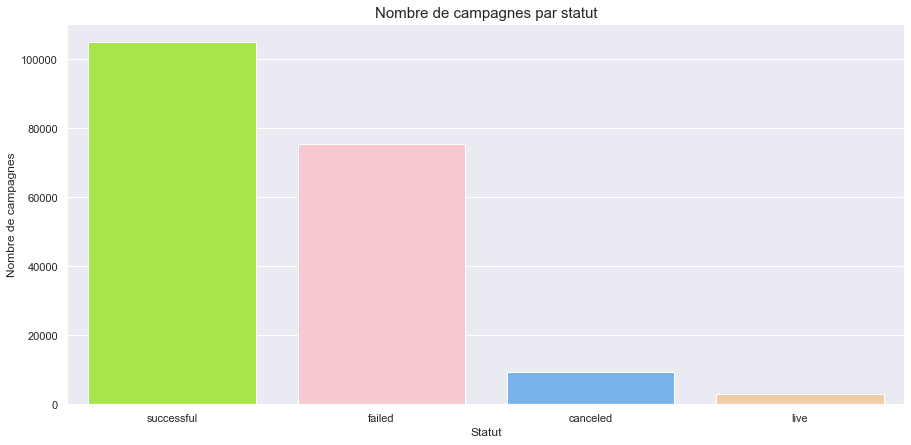

In [143]:
#Distribution de variable 'status'

plt.figure(figsize=(15,7))

g=sns.countplot(x='status', data=df, order=df['status'].value_counts().index, palette=my_palette)

plt.xlabel('Statut')
plt.ylabel('Nombre de campagnes')
plt.title ('Nombre de campagnes par statut', fontsize=15);

In [144]:
#Affichage et décompte des modalités de la variable 'status' dans df

df_status = df.groupby(['status']).agg(count=('id','count'))
df_status = df_status.sort_values(by=['count'], ascending= False)

df_status.head()

,count
status,
successful,105098
failed,75579
canceled,9284
live,2927


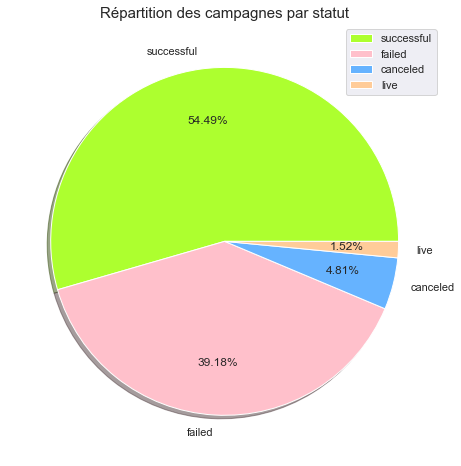

In [145]:
#Répartition des campagnes par statut

plt.figure(figsize=(10,8))

x=df_status['count']

cam=plt.pie(x, labels=['successful','failed','canceled','live'],
            colors=['greenyellow','pink','#66b3ff','#ffcc99'],
            explode = [0, 0, 0, 0],
            labeldistance=1.1,
            autopct= lambda x: str(round(x, 2)) + '%',
            pctdistance = 0.7,shadow = True)

plt.title('Répartition des campagnes par statut', fontsize=15)
plt.legend();

In [146]:
###Cas des campagnes ayant un statut 'live' ou 'canceled'

#Campagnes de statut 'live'
#Ces campagnes (qui représentent 1.52% du nombre de total de campagnes, soit 2927 campagnes) seront utilisées 
#ultérieurement pour la vérification de notre modèle de prédiction.
#En effet, ces campagnes étant desormais terminées, il est désormais possible de connaitre leur statut final 
#('failed' ou 'successful') en allant sur le site Kickcstarter.

df_live = df.loc[df.status == 'live']

#Campagnes de statut 'canceled'
#Au vu de la faible proportion que représentent ces campagnes (4.81%, soit 9284 campagnes), on choisit de les regrouper 
#avec les campagnes de statut 'failed'.

df['status']=df['status'].replace('canceled','failed')

values=['successful','failed']
df=df[df.status.isin(values)]

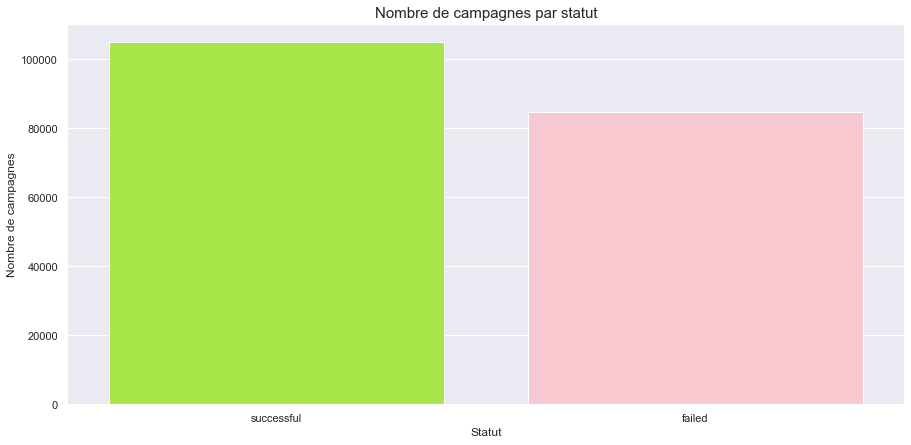

In [147]:
#Nouvelle distribution de variable 'status'

plt.figure(figsize=(15,7))

g=sns.countplot(x='status', data=df, order=df['status'].value_counts().index, palette=my_palette)

plt.xlabel('Statut')
plt.ylabel('Nombre de campagnes')
plt.title ('Nombre de campagnes par statut', fontsize=15);

In [148]:
#Campagnes de statut 'live'

df_live.shape

#Il y a 2927 lignes dans le dataframe df_live. Nous étudierons ces campagnes ultérieurement.

(2927, 22)

In [149]:
#Après suppression/modification des campagnes 'live' et 'canceled' :
#Affichage et décompte des nouvelles modalités de la variable 'status' dans df

df_status = df.groupby(['status']).agg(count=('id','count'))
df_status = df_status.sort_values(by=['count'], ascending= False)

df_status.head()

,count
status,
successful,105098
failed,84863


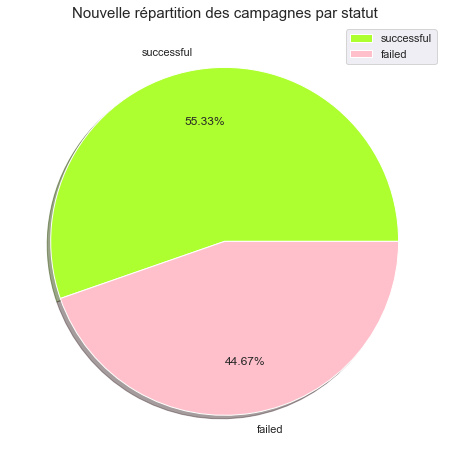

In [150]:
#Nouvelle répartition des campagnes par statut

plt.figure(figsize=(10,8))

x=df_status['count']

cam=plt.pie(x, labels=['successful','failed'], 
            colors=['greenyellow','pink'],
            explode = [0, 0],
            labeldistance=1.1,
            autopct= lambda x: str(round(x, 2)) + '%',
            pctdistance = 0.7,shadow = True)

plt.title('Nouvelle répartition des campagnes par statut', fontsize=15)
plt.legend();

##### Variable Objectif (goal_usd) <a class="anchor" id="section_1_3_2"></a>

In [151]:
#Résumé de la distribution de la variable 'goal_usd'

df['goal_usd'].describe()

count    1.899610e+05
mean     4.380727e+04
std      1.186897e+06
min      1.000000e-02
25%      1.500000e+03
50%      5.000000e+03
75%      1.332500e+04
max      1.354034e+08
Name: goal_usd, dtype: float64

In [152]:
#Distribution de la variable 'goal_usd'

first_quartile = df['goal_usd'].describe()['25%']
third_quartile = df['goal_usd'].describe()['75%']

mean = df['goal_usd'].describe()['mean']
std = df['goal_usd'].describe()['std']
iqr = third_quartile - first_quartile

print("goal_usd (min) :", df['goal_usd'].describe()['min'], "USD")
print("goal_usd (max) :", df['goal_usd'].describe()['max'], "USD")
print('\t')
print("goal_usd (1er quartile) :", first_quartile,"USD")
print("goal_usd (3ème quartile) :", third_quartile, "USD")
print('\t')
print("goal_usd (moyenne) :", round(mean,2), "USD")
print("goal_usd (ecart-type) :", round(std,2), "USD")

goal_usd (min) : 0.01 USD
goal_usd (max) : 135403380.0 USD
	
goal_usd (1er quartile) : 1500.0 USD
goal_usd (3ème quartile) : 13325.0 USD
	
goal_usd (moyenne) : 43807.27 USD
goal_usd (ecart-type) : 1186897.27 USD


In [153]:
#Décompte du nombre de campagnes par quartile

#Recherche de projets dont le montant est < 1er quartile
var1 = df.loc[(df['goal_usd'] < first_quartile)].shape[0]

#Recherche de projets dont le montant est entre le 1er quartile et le 3ème quartile
var2 = df.loc[(df['goal_usd']>=first_quartile)&(df['goal_usd']<third_quartile)].shape[0]

#Recherche de projets dont le montant est entre le 1er quartile et le 3ème quartile
var3 = df.loc[(df['goal_usd'] >= third_quartile)].shape[0]

print("NOMBRE TOTAL DE CAMPAGNES :", len(df))
print('\t')
print("Nombre de campagnes dont le montant est inférieur au 1er quartile :", var1)
print("Nombre de campagnes dont le montant est compris entre le 1er quartile et le 3ème quartile :", var2)
print("Nombre de campagnes dont le montant est supérieur au 3ème quartile :", var3)

NOMBRE TOTAL DE CAMPAGNES : 189961
	
Nombre de campagnes dont le montant est inférieur au 1er quartile : 45963
Nombre de campagnes dont le montant est compris entre le 1er quartile et le 3ème quartile : 96507
Nombre de campagnes dont le montant est supérieur au 3ème quartile : 47491


In [154]:
#Discrétisation de la variable 'goal_usd'

df['goal_usd_class'] = pd.qcut(df['goal_usd'], 4, labels=['0', '1', '2', '3'])

print(df.shape)

df.head(3)

(189961, 23)


<ipython-input-154-65fb464691b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['goal_usd_class'] = pd.qcut(df['goal_usd'], 4, labels=['0', '1', '2', '3'])


,id,name,currency,launched_at,backers_count,blurb,country,deadline,slug,status,...,creator_id,blurb_length,goal_usd,city,duration,launched_year,launched_month,spotlight,urls,goal_usd_class
0,1714728788,Urban Farm Kits: Our Solution to City Farming,CAD,2018-02-10 22:47:52,16,"Earn $1,000 - $20,000+ by transforming idle re...",CA,2018-04-11 21:47:52,urban-farm-kits-our-solution-to-city-farming,failed,...,41046209,122,785.82065,Victoria,60.0,2018,2,False,"{""web"":{""project"":""https://www.kickstarter.com...",0
1,1639965256,Reflections on the LHC Safety Report,USD,2014-11-21 10:42:26,7,"Need Peer Review, Open Source style",US,2014-12-15 10:42:26,reflections-on-the-lhc-safety-report-review-an...,successful,...,1877377173,35,93.00000,San Diego,24.0,2014,11,True,"{""web"":{""project"":""https://www.kickstarter.com...",0
2,1582062943,Ultra-Custom Chocolate Bars,USD,2020-10-19 05:26:59,99,Ultra-customized bean to bar chocolate. Any fl...,US,2020-11-18 05:26:59,ultra-custom-chocolate-bars-0,successful,...,205122366,122,1500.00000,Philadelphia,30.0,2020,10,True,"{""web"":{""project"":""https://www.kickstarter.com...",0


In [155]:
#Affichage et décompte des modalités de la variable 'goal_usd_class'

print(df['goal_usd_class'].value_counts())
print('\t')
print(df['goal_usd_class'].value_counts(normalize=True))

1    53897
0    49707
3    47490
2    38867
Name: goal_usd_class, dtype: int64
	
1    0.283727
0    0.261670
3    0.249999
2    0.204605
Name: goal_usd_class, dtype: float64


In [156]:
#La variable 'goal_usd' a une distribution très étendue : de 0.01 à 135 403 380 dollars
#On crée donc une nouvelle variable dérivée de 'goal_usd' : 'goal_usd_log' (valeur logarithmique)
#Cela permettra d'afficher les objectifs de toutes les campagnes sur un même graphique.

df['goal_usd_log'] = np.log1p(df['goal_usd'])

df.head(3)

<ipython-input-156-cc454f1a6f8b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['goal_usd_log'] = np.log1p(df['goal_usd'])


,id,name,currency,launched_at,backers_count,blurb,country,deadline,slug,status,...,blurb_length,goal_usd,city,duration,launched_year,launched_month,spotlight,urls,goal_usd_class,goal_usd_log
0,1714728788,Urban Farm Kits: Our Solution to City Farming,CAD,2018-02-10 22:47:52,16,"Earn $1,000 - $20,000+ by transforming idle re...",CA,2018-04-11 21:47:52,urban-farm-kits-our-solution-to-city-farming,failed,...,122,785.82065,Victoria,60.0,2018,2,False,"{""web"":{""project"":""https://www.kickstarter.com...",0,6.668000
1,1639965256,Reflections on the LHC Safety Report,USD,2014-11-21 10:42:26,7,"Need Peer Review, Open Source style",US,2014-12-15 10:42:26,reflections-on-the-lhc-safety-report-review-an...,successful,...,35,93.00000,San Diego,24.0,2014,11,True,"{""web"":{""project"":""https://www.kickstarter.com...",0,4.543295
2,1582062943,Ultra-Custom Chocolate Bars,USD,2020-10-19 05:26:59,99,Ultra-customized bean to bar chocolate. Any fl...,US,2020-11-18 05:26:59,ultra-custom-chocolate-bars-0,successful,...,122,1500.00000,Philadelphia,30.0,2020,10,True,"{""web"":{""project"":""https://www.kickstarter.com...",0,7.313887


<Figure size 1080x504 with 0 Axes>

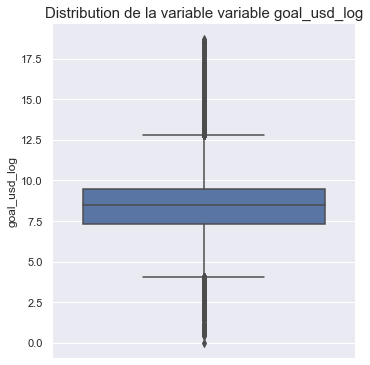

In [157]:
#Affichage de la distribution de la variable 'goal_usd_log'

plt.figure(figsize=(15,7))

sns.catplot(y='goal_usd_log', kind='box', data=df)
plt.title('Distribution de la variable variable goal_usd_log', fontsize=15);

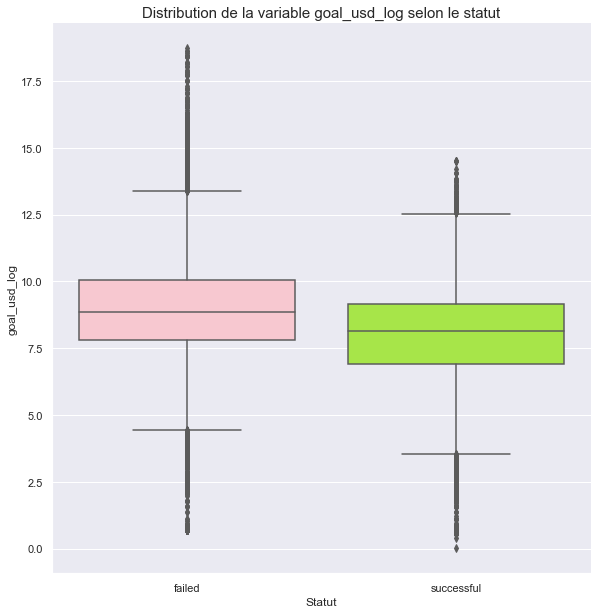

In [158]:
#Distribution de la variable 'goal_usd_log' selon le statut

sns.catplot(x='status', y='goal_usd_log', kind='box', data=df, height=8.27, palette = my_palette)

plt.xlabel('Statut')
plt.title('Distribution de la variable goal_usd_log selon le statut', fontsize=15);

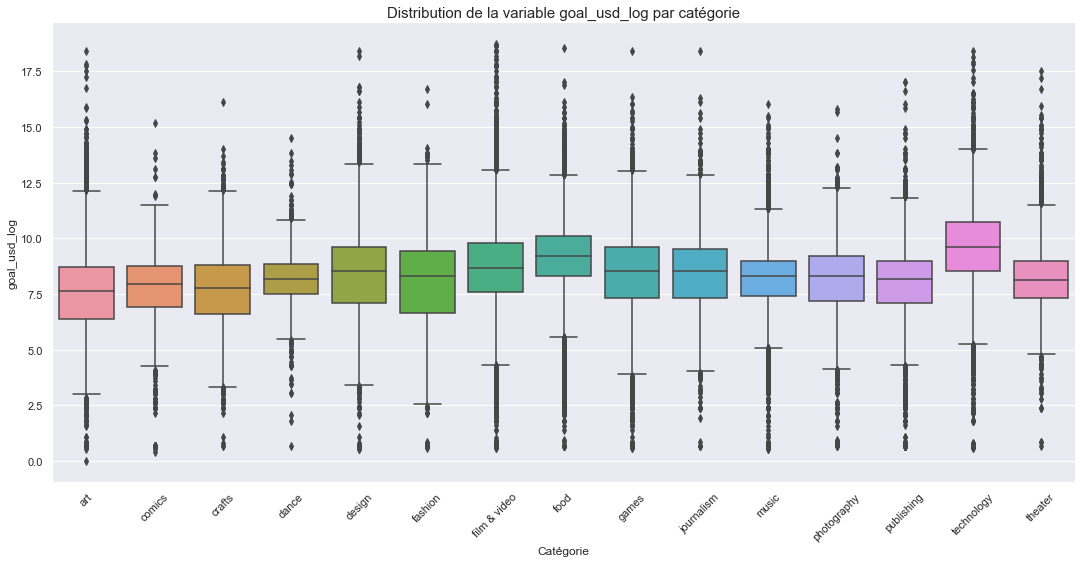

In [159]:
#Distribution de la variable 'goal_usd_log' par catégorie

sns.catplot(x='sub_category', 
            y='goal_usd_log', 
            kind='box', 
            data=df, height=7, aspect=15/7, 
            order=df['sub_category'].value_counts().sort_index(ascending=True).index)

plt.xlabel('Catégorie')
plt.xticks(rotation=45)

plt.title('Distribution de la variable goal_usd_log par catégorie', fontsize=15);

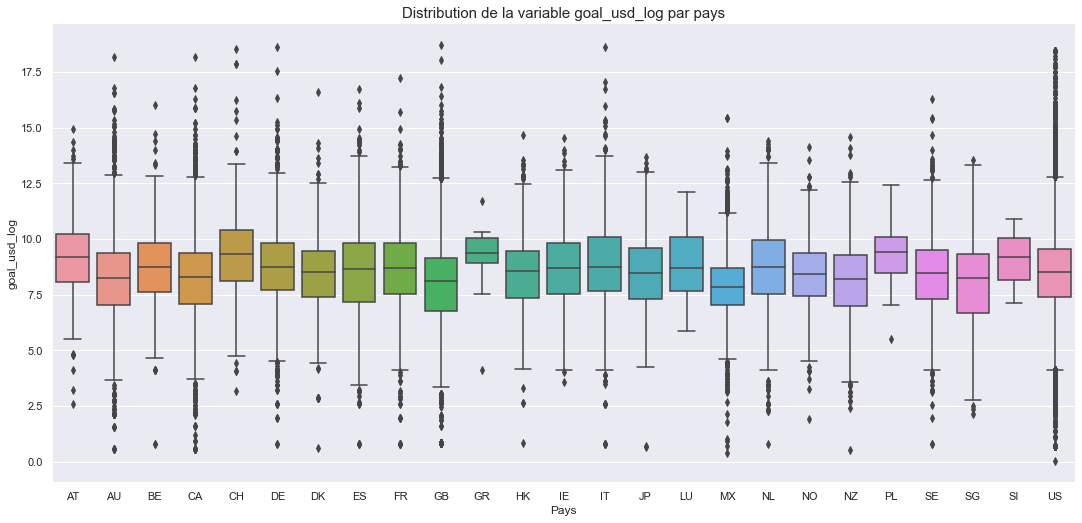

In [160]:
#Distribution de la variable 'goal_usd_log' par pays

sns.catplot(x='country', 
            y='goal_usd_log', 
            kind='box', 
            data=df, height=7, aspect=15/7,
            order=df['country'].value_counts().sort_index(ascending=True).index)

plt.xlabel('Pays')
plt.title('Distribution de la variable goal_usd_log par pays', fontsize=15);

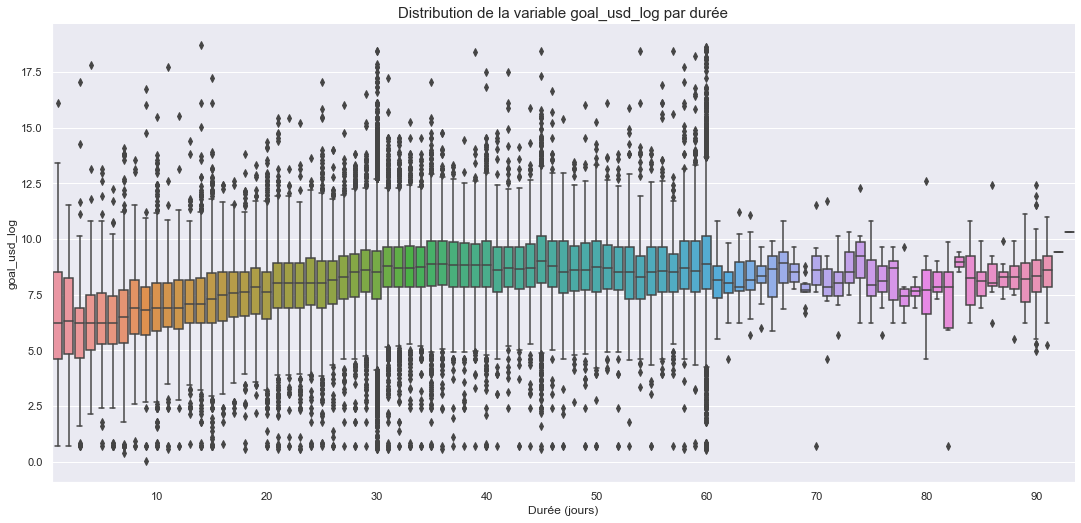

In [161]:
#Distribution de la variable 'goal_usd_log' selon la durée de financement

#On modifie le type de la variable 'duration' (on passe de float en int)
df = df.astype({'duration': int})

sns.catplot(x='duration', y='goal_usd_log', kind='box', data=df, height=7, aspect=15/7)

plt.xticks(list(np.arange(9,90,10)))
plt.xlabel('Durée (jours)')
plt.title('Distribution de la variable goal_usd_log par durée', fontsize=15);

In [162]:
#On souhaite connaitre le taux de réussite des campagnes au sein de chaque quartile

#Changement du type de la variable 'goal_usd_class' (initialement en category) en int64 
df['goal_usd_class']=df['goal_usd_class'].astype('int64')

#Agrégation par quartile
state_summary = df.groupby(['goal_usd_class','status']).agg({'id':'count'})
state_summary

id
goal_usd_class status           
0              failed      16289
               successful  33418
1              failed      21387
               successful  32510
2              failed      17250
               successful  21617
3              failed      29937
               successful  17553

In [163]:
#On souhaite connaitre le taux de réussite des campagnes selon les quartiles

#Calcul du taux de réussite des campagnes selon les quartiles
for i in [0,1,2,3]:
    tot = len(df[df['goal_usd_class'] == i].index)
    state_summary.loc[i,'failed'] = state_summary.loc[i,'failed']/tot*100
    state_summary.loc[i,'successful'] = state_summary.loc[i,'successful']/tot*100
    
state_summary
    
#Conclusion : plus l'objectif est élevé, plus les campagnes ont un risque d'échouer

id
goal_usd_class status               
0              failed      32.770032
               successful  67.229968
1              failed      39.681244
               successful  60.318756
2              failed      44.382124
               successful  55.617876
3              failed      63.038534
               successful  36.961466

In [164]:
state_summary.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, (0, 'failed') to (3, 'successful')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      8 non-null      float64
dtypes: float64(1)
memory usage: 826.0+ bytes


In [165]:
state_summary.rename(columns={"id":"rate"}, inplace=True)
state_summary.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, (0, 'failed') to (3, 'successful')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rate    8 non-null      float64
dtypes: float64(1)
memory usage: 826.0+ bytes


In [166]:
state_summary

rate
goal_usd_class status               
0              failed      32.770032
               successful  67.229968
1              failed      39.681244
               successful  60.318756
2              failed      44.382124
               successful  55.617876
3              failed      63.038534
               successful  36.961466

##### Variable Catégorie (main_category)<a class="anchor" id="section_1_3_3"></a>

In [167]:
#Dans df, il y a une inversion des noms pour les variables 'main_category' (159 modalités) et 'sub_category' (15 modalités).
#On renomme donc la variable 'main_category' en 'sub_category' et inversement.

df.rename(columns={"sub_category":"main_category", "main_category":"sub_category"}, inplace=True)

In [168]:
#Affichage et décompte des modalités de la variable catégorie 'main_category' dans df

df['main_category'].value_counts()

film & video    26513
music           26427
art             20538
technology      19960
publishing      19119
food            15529
games           11654
fashion         10600
comics           7120
photography      6863
design           6785
crafts           5592
theater          5564
journalism       4523
dance            3174
Name: main_category, dtype: int64

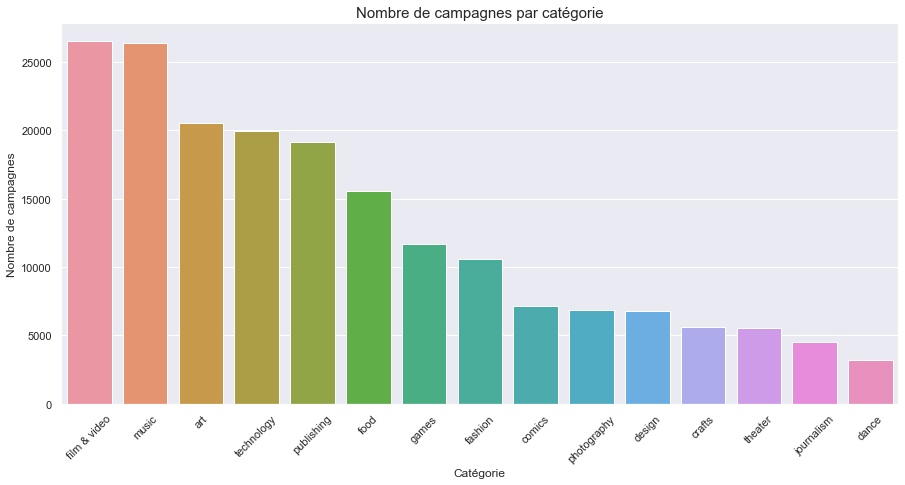

In [169]:
#Affichage du nombre de campagnes par catégorie

plt.figure(figsize=(15,7))

sns.countplot(x='main_category', 
              data=df, 
              order=df['main_category'].value_counts().index)

plt.xlabel('Catégorie')
plt.ylabel('Nombre de campagnes')

plt.xticks(rotation=45)
plt.title ('Nombre de campagnes par catégorie', fontsize=15);

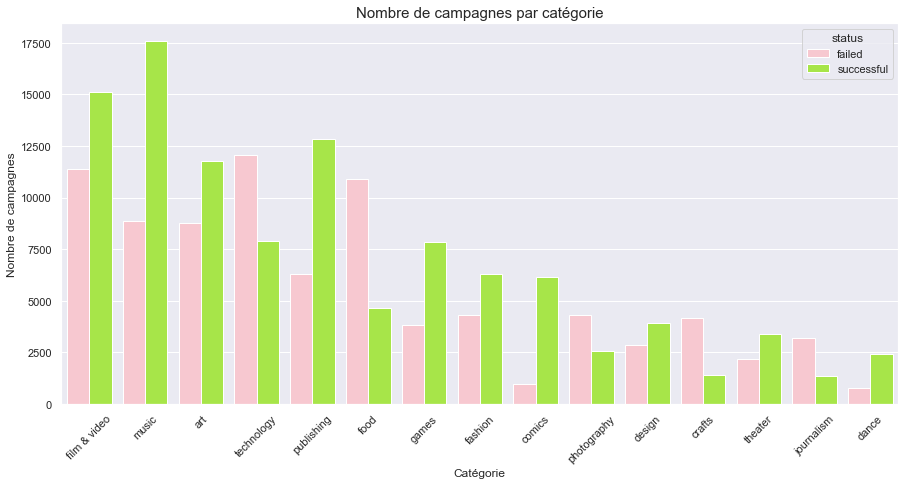

In [170]:
#Affichage du nombre de campagnes par catégorie

plt.figure(figsize=(15,7))

sns.countplot(x='main_category', 
              hue='status', 
              data=df, order=df['main_category'].value_counts().index,
              palette=my_palette)

plt.xlabel('Catégorie')
plt.ylabel('Nombre de campagnes')

plt.xticks(rotation=45)
plt.title ('Nombre de campagnes par catégorie', fontsize=15);

In [171]:
#On souhaite calculer le taux de réussite des campagnes par catégorie 

#Agrégation par catégorie
df_agg_category = df.groupby(['main_category','status']).agg(Total_amount=('usd_pledged', 'sum'),                                                     
                                                   Number_of_campaigns=('id', 'count'))  

df_affiche_category=pd.pivot_table(df_agg_category,
                          values='Number_of_campaigns',
                          index=['main_category'],
                          columns=['status'], 
                          aggfunc=np.sum).reset_index()

#Ajout de la colonne 'success_rate'
df_affiche_category['success_rate']=round(df_affiche_category['successful']/(df_affiche_category['successful']+df_affiche_category['failed'])*100,1)
df_affiche_category=df_affiche_category.sort_values(by=['success_rate'], ascending=False)

df_affiche_category

status,main_category,failed,successful,success_rate
1,comics,966,6154,86.4
3,dance,784,2390,75.3
8,games,3821,7833,67.2
12,publishing,6305,12814,67.0
10,music,8854,17573,66.5
14,theater,2180,3384,60.8
5,fashion,4316,6284,59.3
4,design,2848,3937,58.0
0,art,8782,11756,57.2
6,film & video,11404,15109,57.0


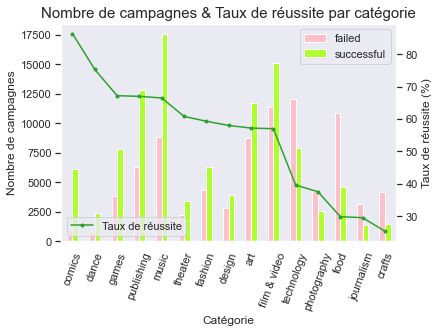

In [172]:
#Affichage du nombre de campagnes et du taux de réussite par catégorie

sns.set(style="dark")

#Définition des couleurs du graphique
colors = ['pink', 'greenyellow', 'tab:green']  #Définition des couleurs du graphique

#Affichage du graphique en barre
ax=df_affiche_category[['main_category','failed','successful']].plot(x='main_category', kind='bar', color=colors[0:2])

ax2 = plt.gca().twinx()

#Affichage de la courbe 'Taux de réussite'
ax2.plot(ax.get_xticks(),df_affiche_category[['success_rate']], linestyle='-',marker='.', color=colors[2], label='Taux de réussite')

#Axe des abcisses
ax.set_xlabel('Catégorie', fontsize=12)    
ax.tick_params(axis='x', rotation=70)    

#Axes des ordonnées
ax.tick_params(axis='y')
ax.set_ylabel('Nombre de campagnes', fontsize=12)  #Légende de l'axe des ordonnées sur la gauche
ax2.set_ylabel('Taux de réussite (%)', fontsize=12)  #Légende de l'axe des ordonnées sur la droite

#Légendes
ax.legend(loc="upper right")
ax2.legend(loc="lower left")

#Titre
plt.title('Nombre de campagnes & Taux de réussite par catégorie', fontsize=15);

##### Variable Sous-catégorie (sub_category)<a class="anchor" id="section_1_3_4"></a>

In [173]:
#Nombre total de sous-catégories

len(df['sub_category'].value_counts())

159

In [174]:
#Nombre total de catégories principales

len(df['main_category'].value_counts())

15

In [175]:
#On souhaite savoir à quelle catégorie principale appartient chaque sous-catégorie

#Création d'un dictionnaire {sous-catégorie:catégorie}
sub_cat_dict = {}

for sub_cat in df['sub_category'].value_counts().index:
    if sub_cat not in sub_cat_dict:
        sub_cat_dict[sub_cat] = df.loc[df['sub_category'] == sub_cat]['main_category'].iloc[0]

In [176]:
#Création du dataframe df_sub_cat_main_cat (à partir du dictionnaire sub_cat_dict)
#Ce dataframe permet de rattacher chaque sous-catégorie à sa catégorie principale

df_sub_cat_main_cat = pd.DataFrame.from_dict(sub_cat_dict, orient='index', columns=['main_category'])
df_sub_cat_main_cat = df_sub_cat_main_cat.reset_index()
df_sub_cat_main_cat.rename(columns={"index":"sub_category"}, inplace = True)

df_sub_cat_main_cat.head(15)

,sub_category,main_category
0,Web,journalism
1,Comedy,theater
2,Classical Music,music
3,Public Art,art
4,Performance Art,art
5,Electronic Music,music
6,Narrative Film,film & video
7,World Music,music
8,Graphic Design,design
9,Mixed Media,art


In [177]:
#Affichage du nombre de sous-catégories par catégorie (à titre informatif)

df_sub_cat_main_cat['main_category'].value_counts()

music           18
film & video    17
publishing      16
technology      15
art             14
crafts          13
food            12
fashion          9
theater          8
games            8
design           8
photography      7
journalism       6
comics           4
dance            4
Name: main_category, dtype: int64

In [178]:
#Top 20 des sous-catégories les plus représentées

df['sub_category'].value_counts().head(20)

Web                 3908
Comedy              2910
Classical Music     2395
Public Art          2394
Performance Art     2394
Electronic Music    2392
Narrative Film      2392
World Music         2391
Graphic Design      2389
Mixed Media         2387
Rock                2385
Hip-Hop             2385
Indie Rock          2384
Country & Folk      2384
Drama               2382
Webseries           2382
Painting            2381
Mobile Games        2381
Pop                 2380
Animation           2378
Name: sub_category, dtype: int64

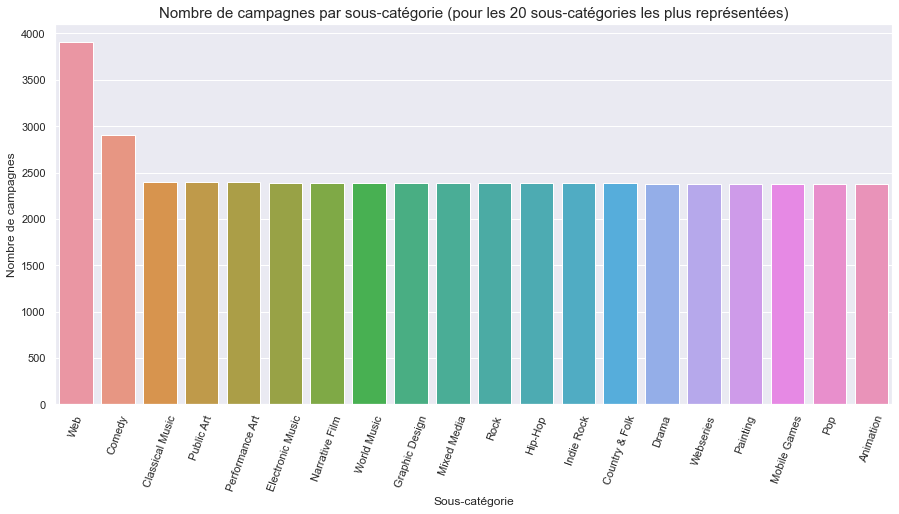

In [179]:
#Affichage du nombre de campagnes par sous-catégorie (pour les 20 sous-catégories les plus représentées)

sns.set(style="darkgrid")
plt.figure(figsize=(15,7))

sns.countplot(x='sub_category', 
              data=df, 
              order=df['sub_category'].value_counts().head(20).index)

plt.xlabel('Sous-catégorie')
plt.ylabel('Nombre de campagnes')

plt.xticks(rotation=70)
plt.title ('Nombre de campagnes par sous-catégorie (pour les 20 sous-catégories les plus représentées)', fontsize=15);

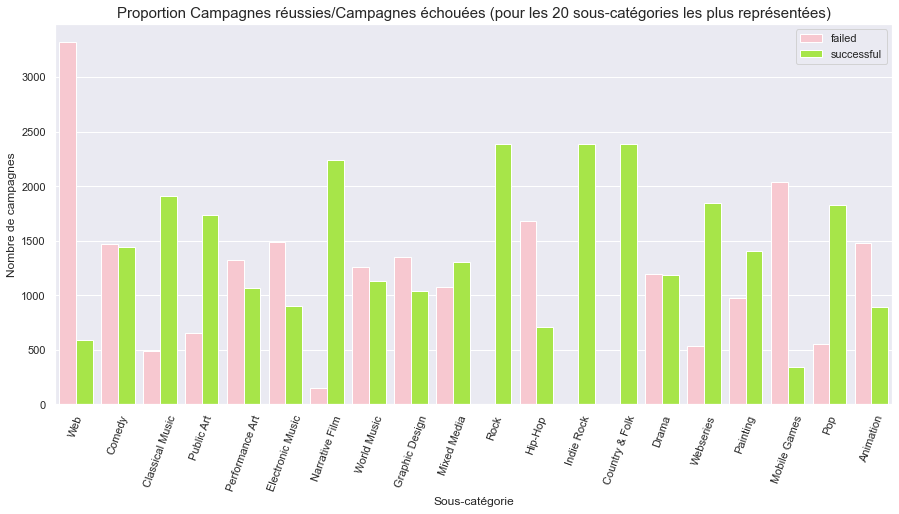

In [180]:
#Affichage du nombre de campagnes par sous-catégorie (pour les 20 sous-catégories les plus représentées)

plt.figure(figsize=(15,7))

sns.countplot(x='sub_category', 
              hue='status', 
              data=df, order=df['sub_category'].value_counts().head(20).index,
              palette=my_palette)

plt.xlabel('Sous-catégorie')
plt.ylabel('Nombre de campagnes')

plt.xticks(rotation=70)
plt.legend(loc='upper right')
plt.title ('Proportion Campagnes réussies/Campagnes échouées (pour les 20 sous-catégories les plus représentées)', fontsize=15);

In [181]:
#On souhaite calculer le taux de réussite des campagnes par sous-catégorie (pour les 20 sous-catégories les plus représentées)

#Extraction des campagnes issues des 20 sous-catégories les plus représentées
df_temp_subcat_top20 = df.loc[df['sub_category'].isin(list(df.sub_category.value_counts().head(20).index))]

#Agrégation par sous-catégorie
df_agg_subcat_top20 = df_temp_subcat_top20.groupby(['sub_category','status']).agg(Total_amount=('usd_pledged', 'sum'),                                                     
                                                   Number_of_campaigns=('id', 'count'))  

df_agg_subcat_top20=pd.pivot_table(df_agg_subcat_top20,
                          values='Number_of_campaigns',
                          index=['sub_category'],
                          columns=['status'], 
                          aggfunc=np.sum).reset_index()

#Remplacement des NaN par 0 pour les sous-catégories n'ayant eu aucun échec
df_agg_subcat_top20['failed'] = df_agg_subcat_top20['failed'].fillna(0)

#Ajout de la colonne 'success_rate'
df_agg_subcat_top20['success_rate']=round(df_agg_subcat_top20['successful']/(df_agg_subcat_top20['successful']+df_agg_subcat_top20['failed'])*100,1)
df_agg_subcat_top20=df_agg_subcat_top20.sort_values(by=['success_rate'], ascending=False)

df_agg_subcat_top20

status,sub_category,failed,successful,success_rate
3,Country & Folk,0.0,2384.0,100.0
16,Rock,0.0,2385.0,100.0
8,Indie Rock,0.0,2384.0,100.0
11,Narrative Film,153.0,2239.0,93.6
1,Classical Music,487.0,1908.0,79.7
18,Webseries,534.0,1848.0,77.6
14,Pop,555.0,1825.0,76.7
15,Public Art,654.0,1740.0,72.7
12,Painting,978.0,1403.0,58.9
9,Mixed Media,1079.0,1308.0,54.8


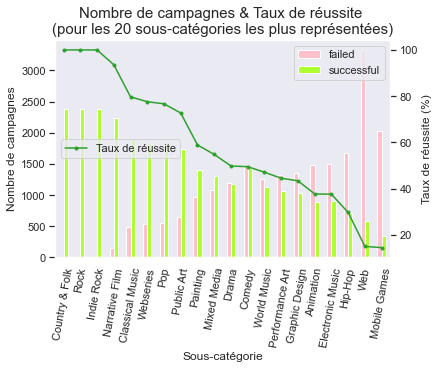

In [182]:
#Affichage du nombre de campagnes et du taux de réussite par sous-catégorie

sns.set(style="dark")

#Définition des couleurs du graphique
colors = ['pink', 'greenyellow', 'tab:green']  #Définition des couleurs du graphique

#Affichage du graphique en barre
ax=df_agg_subcat_top20[['sub_category','failed','successful']].plot(x='sub_category', kind='bar', color=colors[0:2])

ax2 = plt.gca().twinx()

#Affichage de la courbe 'Taux de réussite'
ax2.plot(ax.get_xticks(),df_agg_subcat_top20[['success_rate']], linestyle='-',marker='.', color=colors[2], label='Taux de réussite')

#Axe des abcisses
ax.set_xlabel('Sous-catégorie', fontsize=12)    
ax.tick_params(axis='x', rotation=80)    

#Axes des ordonnées
ax.tick_params(axis='y')
ax.set_ylabel('Nombre de campagnes', fontsize=12)  #Légende de l'axe des ordonnées sur la gauche
ax2.set_ylabel('Taux de réussite (%)', fontsize=12)  #Légende de l'axe des ordonnées sur la droite

#Légendes
ax.legend(loc="upper right")
ax2.legend(loc="center left")

#Titre
plt.title('Nombre de campagnes & Taux de réussite \n(pour les 20 sous-catégories les plus représentées)', fontsize=15);

In [183]:
#Flop 20 des sous-catégories les moins représentées

df['sub_category'].value_counts().tail(20)

Crochet            204
Latin              202
Pet Fashion        196
Design             187
Workshops          186
Embroidery         178
Glass              176
Pottery            170
Typography         149
Literary Spaces    149
Fashion            127
Toys               122
Weaving            121
Quilts              94
Social Practice     91
Residencies         89
Letterpress         81
Games               57
Chiptune            53
Taxidermy           11
Name: sub_category, dtype: int64

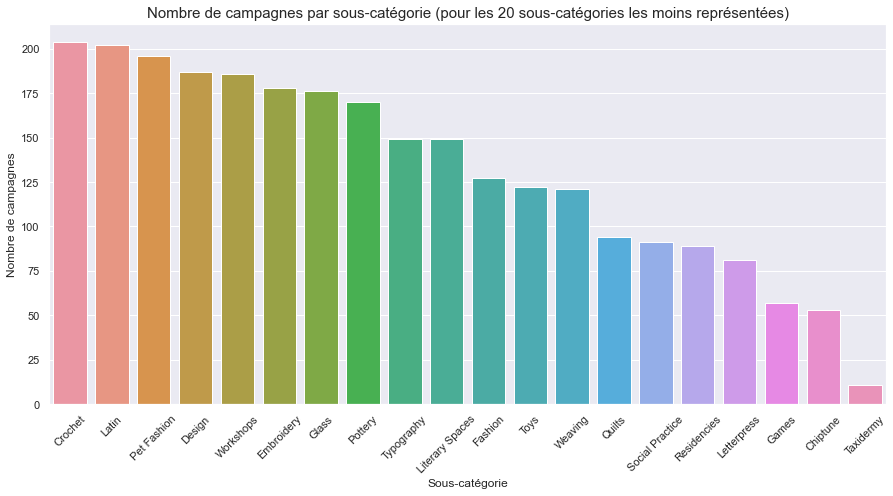

In [184]:
#Affichage du nombre de campagnes par sous-catégorie (pour les 20 sous-catégories les moins représentées)

sns.set(style="darkgrid")
plt.figure(figsize=(15,7))

sns.countplot(x='sub_category', 
              data=df, 
              order=df['sub_category'].value_counts().tail(20).index)

plt.xlabel('Sous-catégorie')
plt.ylabel('Nombre de campagnes')

plt.xticks(rotation=45)
plt.title ('Nombre de campagnes par sous-catégorie (pour les 20 sous-catégories les moins représentées)', fontsize=15);

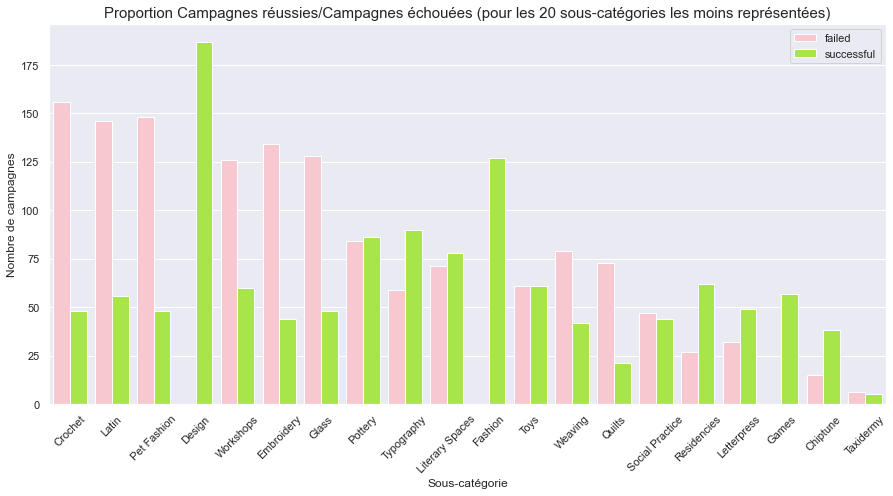

In [185]:
#Affichage du nombre de campagnes par sous-catégorie (pour les 20 sous-catégories les moins représentées)

plt.figure(figsize=(15,7))

sns.countplot(x='sub_category', 
              hue='status', 
              data=df, order=df['sub_category'].value_counts().tail(20).index,
              palette=my_palette)

plt.xlabel('Sous-catégorie')
plt.ylabel('Nombre de campagnes')

plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.title ('Proportion Campagnes réussies/Campagnes échouées (pour les 20 sous-catégories les moins représentées)', fontsize=15);

In [186]:
#On souhaite calculer le taux de réussite des campagnes par sous-catégorie (pour les 20 sous-catégories les moins représentées)

#Extraction des campagnes issues des 20 sous-catégories les moins représentées
df_temp_subcat_flop20 = df.loc[df['sub_category'].isin(list(df.sub_category.value_counts().tail(20).index))]

#Agrégation par sous-catégorie
df_agg_subcat_flop20 = df_temp_subcat_flop20.groupby(['sub_category','status']).agg(Total_amount=('usd_pledged', 'sum'),                                                     
                                                   Number_of_campaigns=('id', 'count'))  

df_agg_subcat_flop20=pd.pivot_table(df_agg_subcat_flop20,
                          values='Number_of_campaigns',
                          index=['sub_category'],
                          columns=['status'], 
                          aggfunc=np.sum).reset_index()

#Remplacement des NaN par 0 pour les sous-catégories n'ayant eu aucun échec
df_agg_subcat_flop20['failed'] = df_agg_subcat_flop20['failed'].fillna(0)

#Ajout de la colonne 'success_rate'
df_agg_subcat_flop20['success_rate']=round(df_agg_subcat_flop20['successful']/(df_agg_subcat_flop20['successful']+df_agg_subcat_flop20['failed'])*100,1)
df_agg_subcat_flop20=df_agg_subcat_flop20.sort_values(by=['success_rate'], ascending=False)

df_agg_subcat_flop20

status,sub_category,failed,successful,success_rate
2,Design,0.0,187.0,100.0
4,Fashion,0.0,127.0,100.0
5,Games,0.0,57.0,100.0
0,Chiptune,15.0,38.0,71.7
13,Residencies,27.0,62.0,69.7
8,Letterpress,32.0,49.0,60.5
17,Typography,59.0,90.0,60.4
9,Literary Spaces,71.0,78.0,52.3
11,Pottery,84.0,86.0,50.6
16,Toys,61.0,61.0,50.0


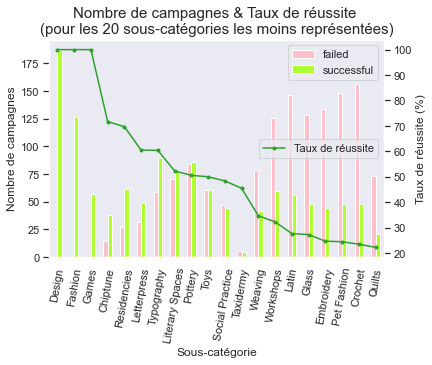

In [187]:
#Affichage du nombre de campagnes et du taux de réussite par sous-catégorie

sns.set(style="dark")

#Définition des couleurs du graphique
colors = ['pink', 'greenyellow', 'tab:green']  #Définition des couleurs du graphique

#Affichage du graphique en barre
ax=df_agg_subcat_flop20[['sub_category','failed','successful']].plot(x='sub_category', kind='bar', color=colors[0:2])

ax2 = plt.gca().twinx()

#Affichage de la courbe 'Taux de réussite'
ax2.plot(ax.get_xticks(),df_agg_subcat_flop20[['success_rate']], linestyle='-',marker='.', color=colors[2], label='Taux de réussite')

#Axe des abcisses
ax.set_xlabel('Sous-catégorie', fontsize=12)    
ax.tick_params(axis='x', rotation=80)    

#Axes des ordonnées
ax.tick_params(axis='y')
ax.set_ylabel('Nombre de campagnes', fontsize=12)  #Légende de l'axe des ordonnées sur la gauche
ax2.set_ylabel('Taux de réussite (%)', fontsize=12)  #Légende de l'axe des ordonnées sur la droite

#Légendes
ax.legend(loc="upper right")
ax2.legend(loc="center right")

#Titre
plt.title('Nombre de campagnes & Taux de réussite \n(pour les 20 sous-catégories les moins représentées)', fontsize=15);

##### Variable Année (launched_year) <a class="anchor" id="section_1_3_5"></a>

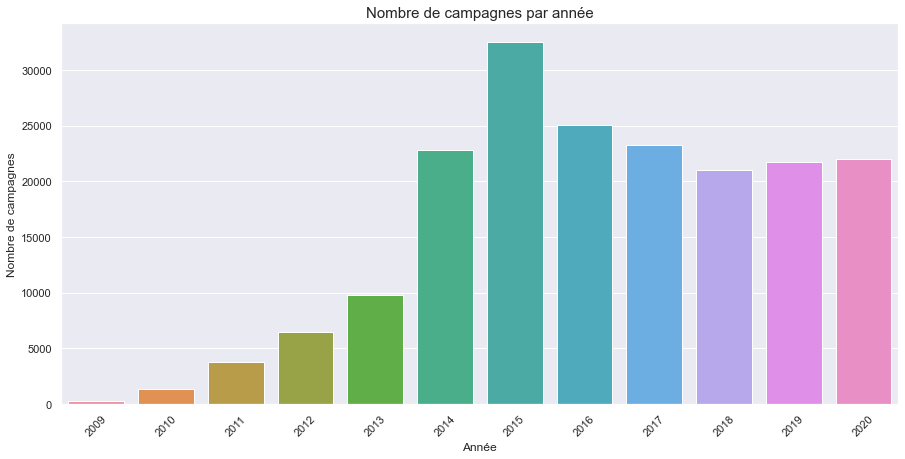

In [188]:
#Affichage du nombre de campagnes selon l'année de lancement

sns.set(style="darkgrid")

plt.figure(figsize=(15,7))

sns.countplot(x='launched_year', data=df)

plt.xlabel('Année')
plt.ylabel('Nombre de campagnes')

plt.xticks(rotation=45)
plt.title ('Nombre de campagnes par année', fontsize=15);

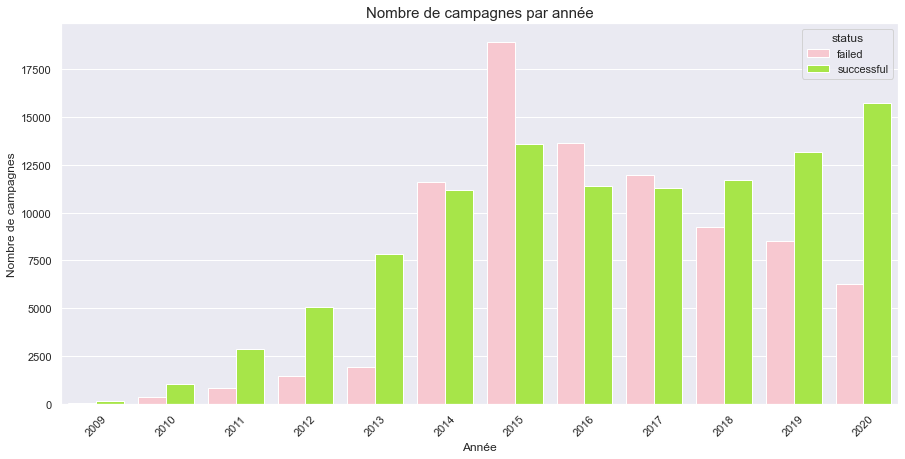

In [189]:
#Affichage du nombre de campagnes selon l'année de lancement

plt.figure(figsize=(15,7))

sns.countplot(x='launched_year', hue='status', data=df, palette=my_palette)

plt.xlabel('Année')
plt.ylabel('Nombre de campagnes')

plt.xticks(rotation=45)
plt.title ('Nombre de campagnes par année', fontsize=15);

In [190]:
#On souhaite calculer le taux de réussite des campagnes par année

#Agrégation par année
df_agg_year = df.groupby(['launched_year','status']).agg(Total_amount=('usd_pledged', 'sum'),                                                     
                                                   Number_of_campaigns=('id', 'count'))  

df_affiche_year=pd.pivot_table(df_agg_year,
                          values='Number_of_campaigns',
                          index=['launched_year'],
                          columns=['status'], 
                          aggfunc=np.sum).reset_index()

#Ajout de la colonne 'success_rate'
df_affiche_year['success_rate']=round(df_affiche_year['successful']/(df_affiche_year['successful']+df_affiche_year['failed'])*100,1)

df_affiche_year.head(10)

status,launched_year,failed,successful,success_rate
0,2009,46,176,79.3
1,2010,339,1016,75.0
2,2011,833,2897,77.7
3,2012,1444,5050,77.8
4,2013,1949,7848,80.1
5,2014,11611,11175,49.0
6,2015,18953,13607,41.8
7,2016,13627,11412,45.6
8,2017,11984,11278,48.5
9,2018,9259,11733,55.9


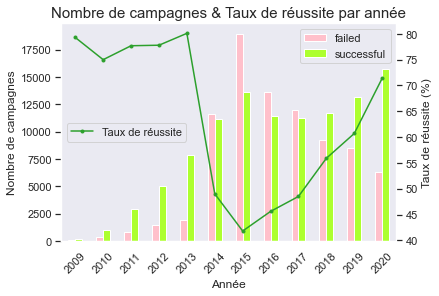

In [191]:
#Affichage du nombre de campagnes et du taux de réussite selon les années

sns.set(style="dark")

#Définition des couleurs du graphique
colors = ['pink', 'greenyellow', 'tab:green']  #Définition des couleurs du graphique

#Affichage du graphique en barre
ax=df_affiche_year[['launched_year','failed','successful']].plot(x='launched_year', kind='bar', color=colors[0:2])

ax2 = plt.gca().twinx()

#Affichage de la courbe 'Taux de réussite'
ax2.plot(ax.get_xticks(),df_affiche_year[['success_rate']], linestyle='-',marker='.', color=colors[2], label='Taux de réussite')

#Axe des abcisses
ax.set_xlabel('Année', fontsize=12)   
ax.tick_params(axis='x', rotation=45)

#Axes des ordonnées
ax.tick_params(axis='y')
ax.set_ylabel('Nombre de campagnes', fontsize=12)  #Légende de l'axe des ordonnées sur la gauche
ax2.set_ylabel('Taux de réussite (%)', fontsize=12)  #Légende de l'axe des ordonnées sur la droite

#Légendes
ax.legend(loc="upper right")
ax2.legend(loc="center left")

#Titre
plt.title('Nombre de campagnes & Taux de réussite par année', fontsize=15);

##### Variable Mois (launched_month)<a class="anchor" id="section_1_3_6"></a>

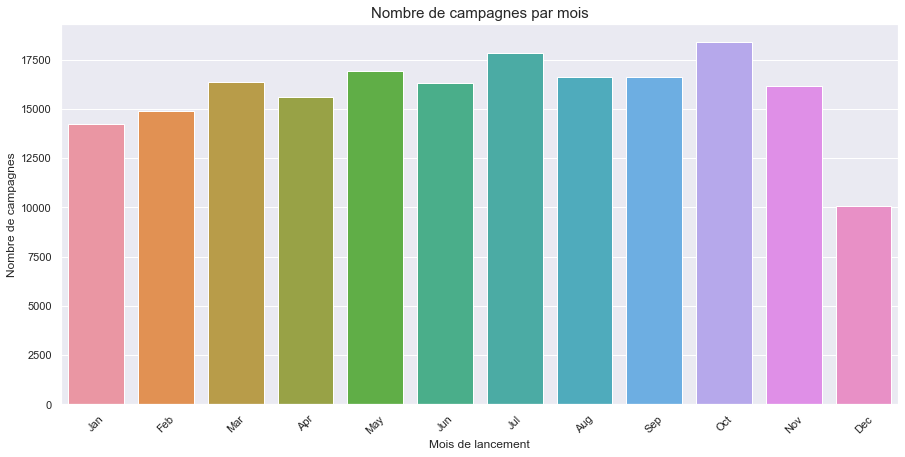

In [192]:
#Affichage du nombre de campagnes par mois

sns.set(style="darkgrid")

plt.figure(figsize=(15,7))

sns.countplot(x='launched_month', data=df)

month_starts = [0,1,2,3,4,5,6,7,8,9,10,11]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 

plt.gca().set_xticks(month_starts)
plt.gca().set_xticklabels(month_names)

plt.xlabel('Mois de lancement')
plt.ylabel('Nombre de campagnes')

plt.xticks(rotation=45)

plt.title ('Nombre de campagnes par mois', fontsize=15);

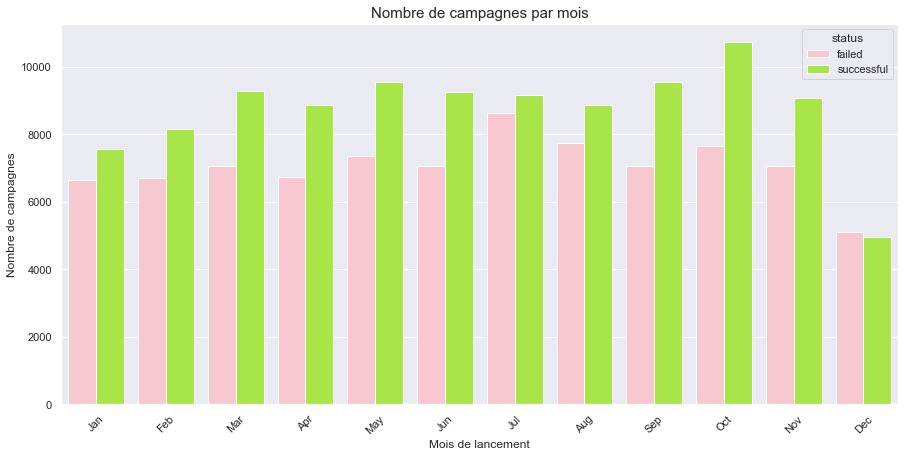

In [193]:
#Affichage du nombre de campagnes par mois

plt.figure(figsize=(15,7))

sns.countplot(x='launched_month', hue='status', data=df, palette=my_palette)

month_starts = [0,1,2,3,4,5,6,7,8,9,10,11]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 

plt.gca().set_xticks(month_starts)
plt.gca().set_xticklabels(month_names)

plt.xlabel('Mois de lancement')
plt.ylabel('Nombre de campagnes')

plt.xticks(rotation=45)

plt.title ('Nombre de campagnes par mois', fontsize=15);

In [194]:
#On souhaite calculer le taux de réussite des campagnes par mois

#Agrégation par mois
df_agg_month = df.groupby(['launched_month','status']).agg(Total_amount=('usd_pledged', 'sum'),                                                     
                                                   Number_of_campaigns=('id', 'count'))   

df_affiche_month=pd.pivot_table(df_agg_month,
                          values='Number_of_campaigns',
                          index=['launched_month'],
                          columns=['status'], 
                          aggfunc=np.sum).reset_index()

#Ajout de la colonne 'success_rate'
df_affiche_month['success_rate']=round(df_affiche_month['successful']/(df_affiche_month['successful']+df_affiche_month['failed'])*100,1)

df_affiche_month.head()

status,launched_month,failed,successful,success_rate
0,1,6650,7579,53.3
1,2,6708,8174,54.9
2,3,7067,9297,56.8
3,4,6743,8861,56.8
4,5,7350,9558,56.5


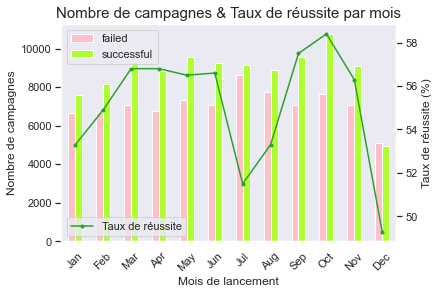

In [195]:
#Affichage du nombre de campagnes et du taux de réussite selon les mois

sns.set(style="dark")

#Définition des couleurs du graphique
colors = ['pink', 'greenyellow', 'tab:green']  #Définition des couleurs du graphique

#Affichage du graphique en barre
ax=df_affiche_month[['launched_month','failed','successful']].plot(x='launched_month', kind='bar', color=colors[0:2])

ax2 = plt.gca().twinx()

#Affichage de la courbe 'Taux de réussite'
ax2.plot(ax.get_xticks(),df_affiche_month[['success_rate']], linestyle='-',marker='.', color=colors[2], label='Taux de réussite')

#Axe des abcisses
ax.set_xlabel('Mois de lancement', fontsize=12)    
month_starts = [0,1,2,3,4,5,6,7,8,9,10,11]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 
plt.gca().set_xticks(month_starts)
plt.gca().set_xticklabels(month_names)
ax.tick_params(axis='x', rotation=45)    

#Axes des ordonnées
ax.tick_params(axis='y')
ax.set_ylabel('Nombre de campagnes', fontsize=12)  #Légende de l'axe des ordonnées sur la gauche
ax2.set_ylabel('Taux de réussite (%)', fontsize=12)  #Légende de l'axe des ordonnées sur la droite

#Légendes
ax.legend(loc="upper left")
ax2.legend(loc="lower left")

#Titre
plt.title('Nombre de campagnes & Taux de réussite par mois', fontsize=15);

##### Variable Durée (duration) <a class="anchor" id="section_1_3_7"></a>

<Figure size 1080x504 with 0 Axes>

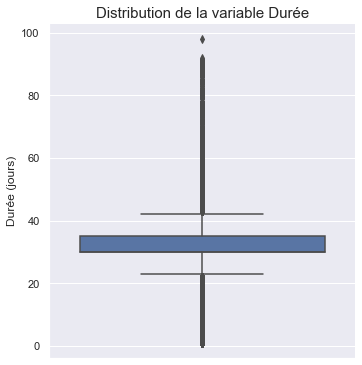

In [196]:
#Distribution de la variable Durée

sns.set(style="darkgrid")

plt.figure(figsize=(15,7))

sns.catplot(y='duration', kind='box', data=df)

plt.ylabel('Durée (jours)')
plt.title('Distribution de la variable Durée', fontsize=15);

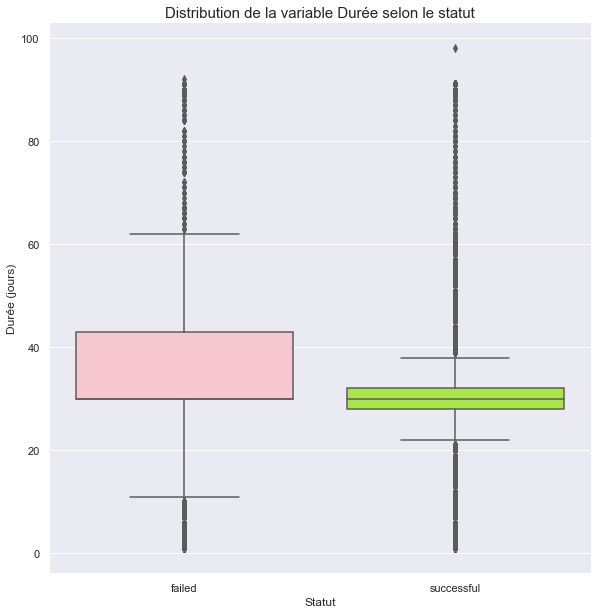

In [197]:
#Distribution de la variable Durée selon le statut

sns.catplot(x='status', y='duration', kind='box', data=df, height=8.27, palette=my_palette)

plt.xlabel('Statut')
plt.ylabel('Durée (jours)')

plt.title('Distribution de la variable Durée selon le statut', fontsize=15);

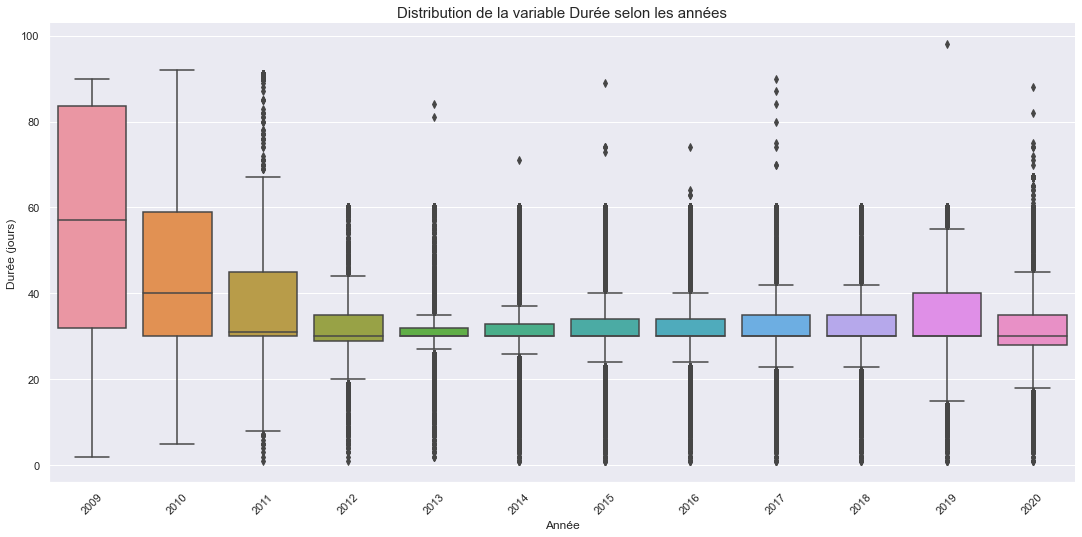

In [198]:
#Distribution de la variable Durée selon les années

sns.catplot(x='launched_year', y='duration', kind='box', data=df, height=7, aspect=15/7)

plt.xlabel('Année')
plt.ylabel('Durée (jours)')

plt.xticks(rotation=45)

plt.title('Distribution de la variable Durée selon les années', fontsize=15);

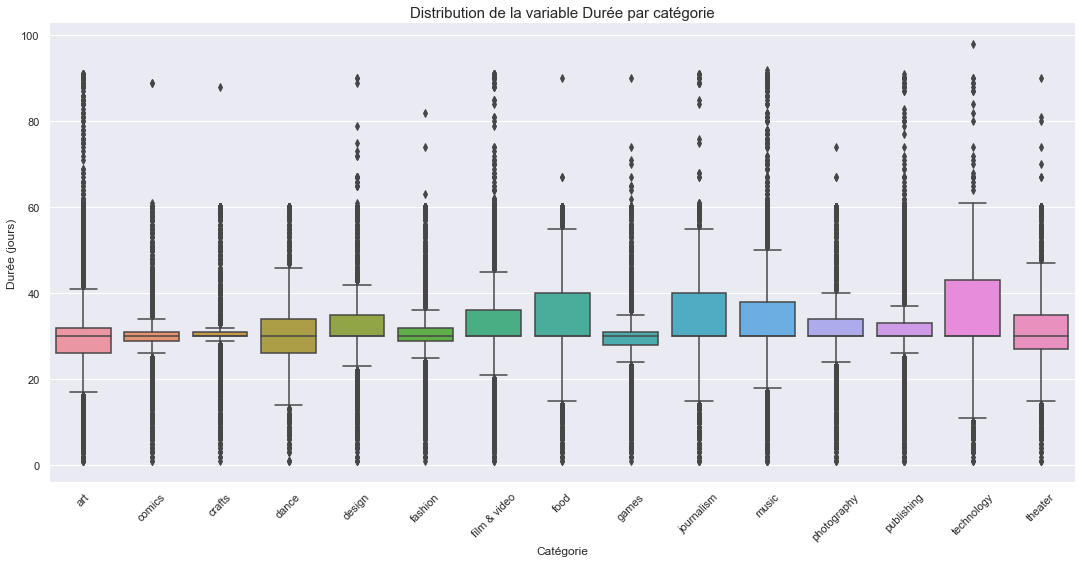

In [199]:
#Distribution de la variable Durée par catégorie

sns.catplot(x='main_category', y='duration', 
            kind='box', 
            data=df, 
            height=7, 
            aspect=15/7,
            order=df['main_category'].value_counts().sort_index(ascending=True).index)

plt.xlabel('Catégorie')
plt.ylabel('Durée (jours)')

plt.xticks(rotation=45)

plt.title('Distribution de la variable Durée par catégorie', fontsize=15);

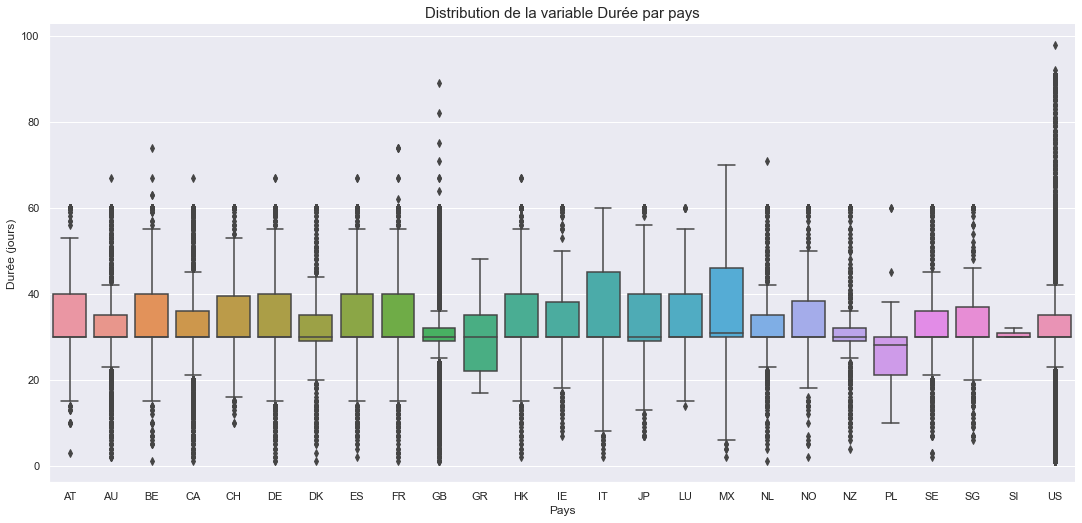

In [200]:
#Distribution de la variable Durée par pays

sns.catplot(x='country', 
            y='duration', 
            kind='box', 
            data=df, 
            height=7, 
            aspect=15/7, 
            order=df['country'].value_counts().sort_index(ascending=True).index)

plt.xlabel('Pays')
plt.ylabel('Durée (jours)')

plt.title('Distribution de la variable Durée par pays', fontsize=15);

##### Variable Slogan (blurb) <a class="anchor" id="section_1_3_8"></a>

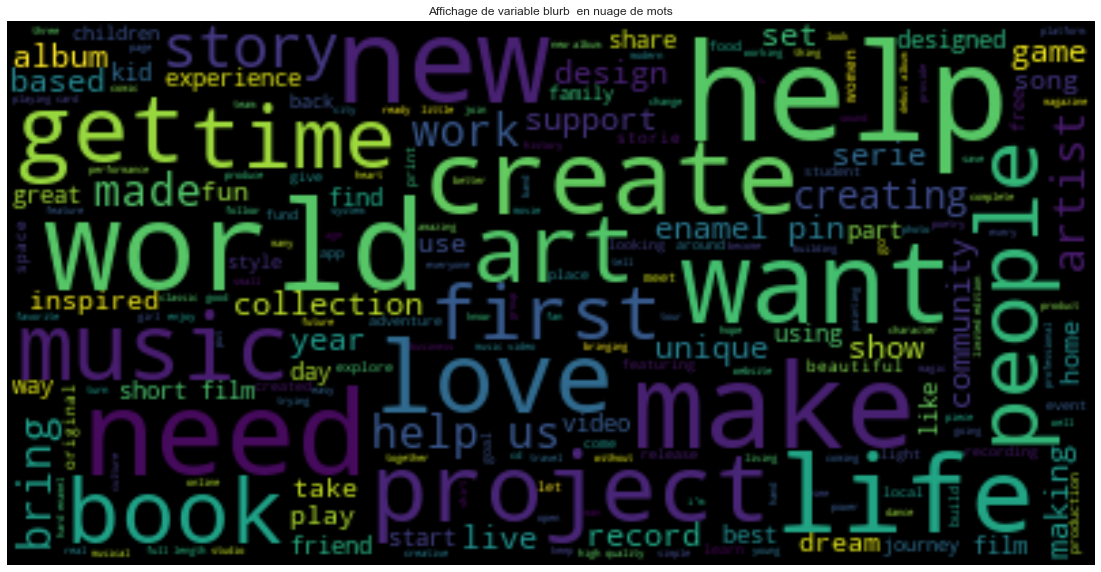

In [201]:
#Recherche de mots prédominants dans les campagnes de financement (réussies ou non)
text = ' '.join(review.lower() for review in df.blurb)
stop_words = set(stopwords.words('english'))
stop_words.update([".",",","!","''","&","'s","``",":","-",")","(","()","?","'","...","one","two","de",""])

plt.figure(figsize= (20,10))

#Créer et générer un word cloud image
wordcloud = WordCloud(
                     max_words=200, 
                     stopwords=stop_words,                      
                     max_font_size=50, 
                     random_state=42).generate(text)


wordcloud.to_file("wordcloud.png")

#Afficher l'image générée
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Affichage de variable blurb  en nuage de mots')
plt.axis("off")
plt.show()

In [202]:
#On crée les fonctions stop_words_filetring et recherche_mots_frquents

def stop_words_filetring(mots) : 
    tokens = []
    for mot in mots:
        if mot not in stop_words:
            tokens.append(mot)
    return tokens

stop_words = set(stopwords.words('english'))
stop_words.update([".",",","!","''","&","'s","``",":","-",")","(","()","?","'","...","one","two","de",""])
print(stop_words)

def recherche_mots_frquents(text,nombre_frequence):
    
    token = word_tokenize(text)
    token=stop_words_filetring(token)

    fdist = FreqDist(token)
    # To find the frequency of top 10 words
    fdist1 = fdist.most_common(nombre_frequence)
    return  fdist1 

{'', 'down', "she's", 'which', 'wasn', 'didn', 'who', 'me', 'were', 'few', "weren't", "you'll", 'each', 'after', "shan't", '()', 'my', 'other', "didn't", 'own', "wasn't", 'against', ',', 'when', 'for', 'into', 'until', 'most', '.', 'as', 'will', '!', 'doing', 'myself', 'ourselves', 'because', 'here', 'nor', 'been', 'does', 'de', 'it', 'whom', 'yourself', 'very', '&', 'our', 'shan', 'don', 'hasn', "mustn't", 'themselves', 'there', 'hadn', 'ma', 'those', 'not', "haven't", 'or', 'some', 'one', "aren't", 'two', 'his', 'than', 'up', 'having', 'their', 'to', "wouldn't", 'by', 'mustn', 'these', "'", 'll', 'of', 'himself', 'between', 'has', 'can', 's', 'did', 'with', "hasn't", "don't", 'are', 'then', 'doesn', 'over', 'same', 'mightn', 'that', 'weren', 'under', 'the', "couldn't", 're', 'herself', 'about', 'am', "you're", 'them', 'aren', "that'll", "mightn't", ')', 'theirs', 'in', 'yours', 'what', 'was', 'needn', "won't", ':', 'on', 'only', 'i', 'during', 'just', 'if', 'why', "you've", 'they', '

In [203]:
text = ' '.join(review.lower() for review in df.loc[df['status']=='successful'].blurb)
liste_mots=recherche_mots_frquents(text,15)
liste_mots

[('new', 11001),
 ('help', 10601),
 ('album', 7167),
 ('book', 6995),
 ('first', 5605),
 ('world', 5497),
 ('music', 5380),
 ('art', 5303),
 ('film', 4899),
 ('us', 4359),
 ('make', 3971),
 ('life', 3911),
 ('series', 3697),
 ('story', 3411),
 ('love', 3388)]

In [204]:
text = ' '.join(review.lower() for review in df.blurb)
liste_mots=recherche_mots_frquents(text,15)
liste_mots

[('help', 18214),
 ('new', 17241),
 ('world', 10065),
 ('music', 10041),
 ('book', 10041),
 ('album', 9794),
 ('art', 9273),
 ('first', 8740),
 ('make', 8232),
 ('film', 8109),
 ('life', 7177),
 ('us', 7088),
 ('need', 6560),
 ('project', 6456),
 ('love', 6222)]

In [205]:
text = ' '.join(review.lower() for review in df.loc[df['status']=='failed'].blurb)
liste_mots=recherche_mots_frquents(text,15)
liste_mots

[('help', 7613),
 ('new', 6240),
 ('music', 4660),
 ('world', 4568),
 ('make', 4261),
 ('want', 4012),
 ('art', 3970),
 ('create', 3671),
 ('people', 3520),
 ('life', 3266),
 ('project', 3250),
 ('film', 3210),
 ('need', 3182),
 ('first', 3135),
 ('book', 3046)]

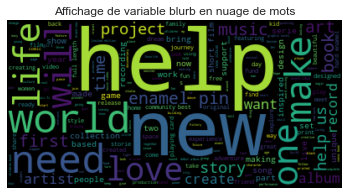

In [206]:
#Recherche de mots prédominants dans les campagnes de financement réussies
text = ' '.join(review.lower() for review in df.loc[df['status']=='successful'].blurb)

#Créer et générer un word cloud image
wordcloud = WordCloud().generate(text)

#Afficher l'image générée
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Affichage de variable blurb en nuage de mots')
plt.axis("off")
plt.show()

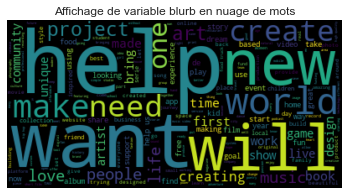

In [207]:
#Recherche de mots prédominants dans les campagnes de financement échouées
text = ' '.join(review.lower() for review in df.loc[df['status']=='failed'].blurb)

#Créer et générer a word cloud image
wordcloud = WordCloud().generate(text)

#Afficher l'image generée
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Affichage de variable blurb en nuage de mots')
plt.axis("off")
plt.show()

##### Variable Longueur slogan  (blurb_length) <a class="anchor" id="section_1_3_9"></a>

<Figure size 1080x504 with 0 Axes>

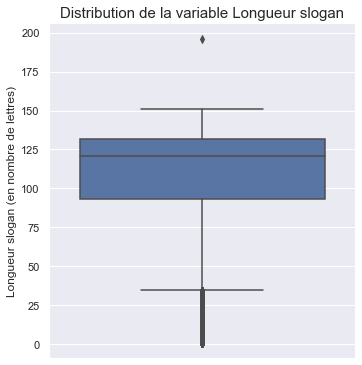

In [208]:
#Distribution de la variable Longueur slogan

sns.set(style="darkgrid")
plt.figure(figsize=(15,7))

sns.catplot(y='blurb_length', kind='box', data=df)

plt.ylabel('Longueur slogan (en nombre de lettres)')
plt.title('Distribution de la variable Longueur slogan', fontsize=15);

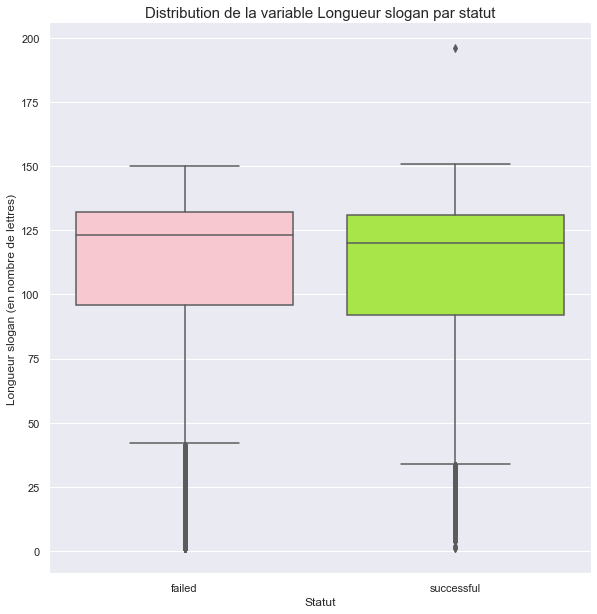

In [209]:
#Distribution de la variable Longueur slogan selon le statut

sns.catplot(x='status', y='blurb_length', kind='box', data=df, height=8.27, palette=my_palette)

plt.xlabel('Statut')
plt.ylabel('Longueur slogan (en nombre de lettres)')

plt.title('Distribution de la variable Longueur slogan par statut', fontsize=15);

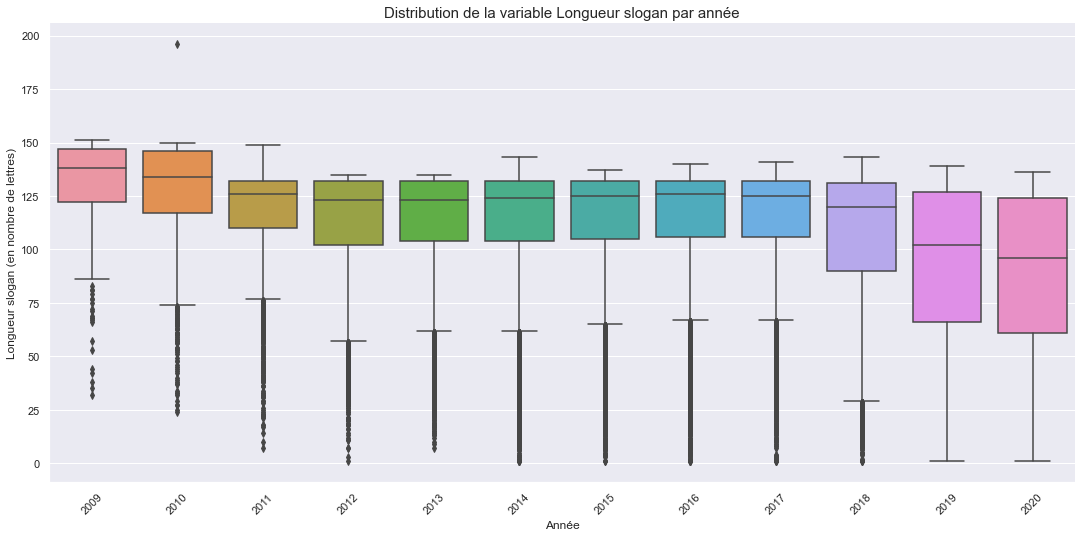

In [210]:
#Distribution de la variable Longueur slogan selon les années

sns.catplot(x='launched_year', y='blurb_length', kind='box', data=df, height=7, aspect=15/7)

plt.xlabel('Année')
plt.ylabel('Longueur slogan (en nombre de lettres)')

plt.xticks(rotation=45)

plt.title('Distribution de la variable Longueur slogan par année', fontsize=15);

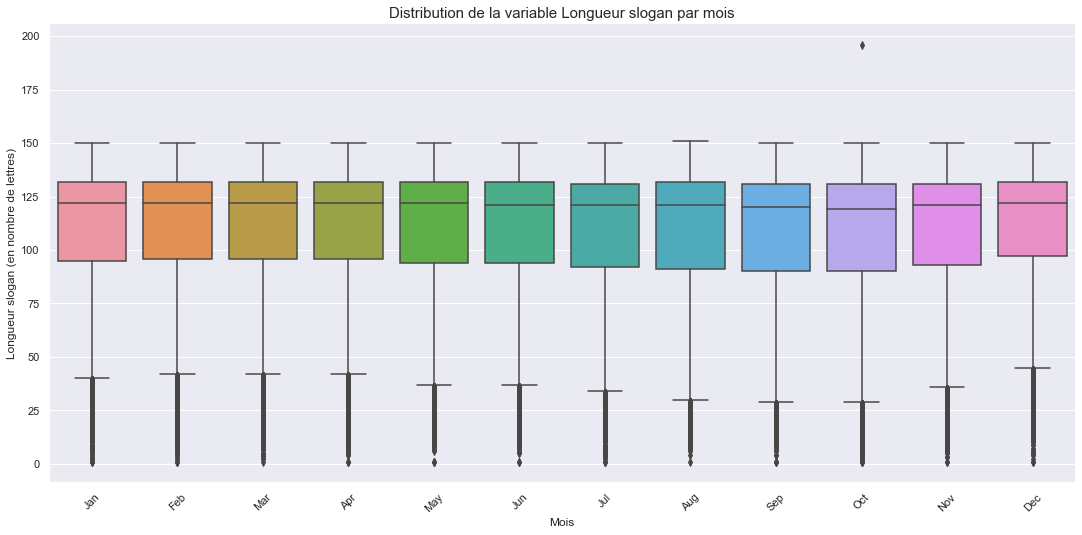

In [211]:
#Distribution de la variable Longueur slogan selon les mois de lancement

sns.catplot(x='launched_month', y='blurb_length', kind='box', data=df, height=7, aspect=15/7)

month_starts = [0,1,2,3,4,5,6,7,8,9,10,11]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 

plt.gca().set_xticks(month_starts)
plt.gca().set_xticklabels(month_names)

plt.xlabel('Mois')
plt.ylabel('Longueur slogan (en nombre de lettres)')

plt.xticks(rotation=45)

plt.title('Distribution de la variable Longueur slogan par mois', fontsize=15);

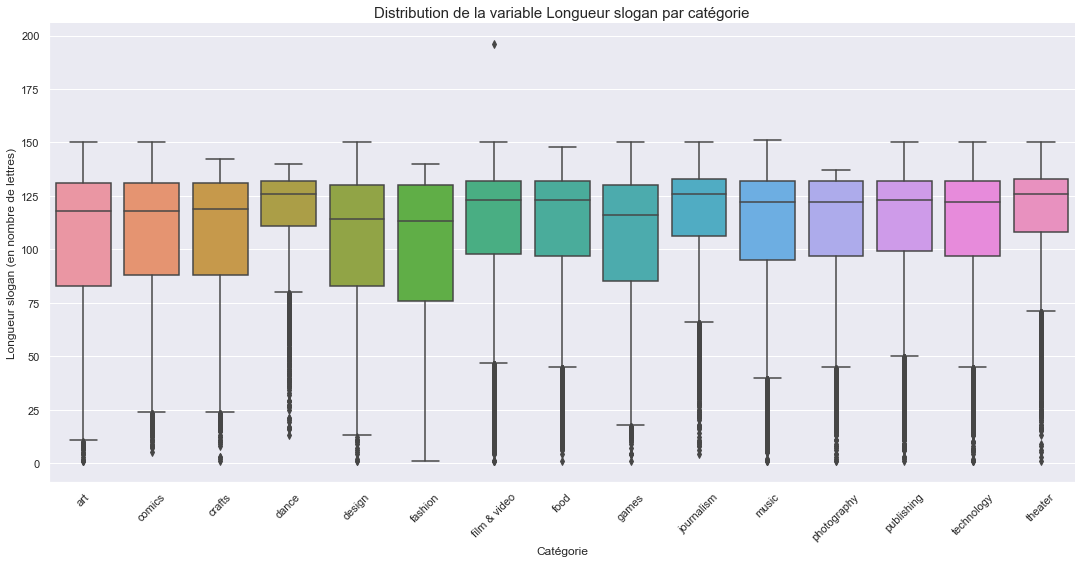

In [212]:
#Distribution de la variable Longueur slogan selon les catégories

sns.catplot(x='main_category', 
            y='blurb_length', 
            kind='box', 
            data=df, 
            height=7, 
            aspect=15/7,
            order=df['main_category'].value_counts().sort_index(ascending=True).index)

plt.xticks(rotation=45)

plt.xlabel('Catégorie')
plt.ylabel('Longueur slogan (en nombre de lettres)')

plt.xticks(rotation=45)

plt.title('Distribution de la variable Longueur slogan par catégorie', fontsize=15);

##### Variable Pays (country) <a class="anchor" id="section_1_3_10"></a>

In [213]:
#Nombre total de pays

len(df['country'].value_counts())

25

In [214]:
#Nombre de projets par pays

df_agg_pays = df.groupby(['country']).agg(number_of_campaigns=('id', 'count'))
df_agg_pays = df_agg_pays.sort_values(by=['number_of_campaigns'], ascending = False).reset_index()

df_agg_pays

,country,number_of_campaigns
0,US,131848
1,GB,21252
2,CA,8878
3,AU,4473
4,DE,3407
5,FR,2761
6,MX,2745
7,IT,2431
8,ES,2132
9,NL,1677


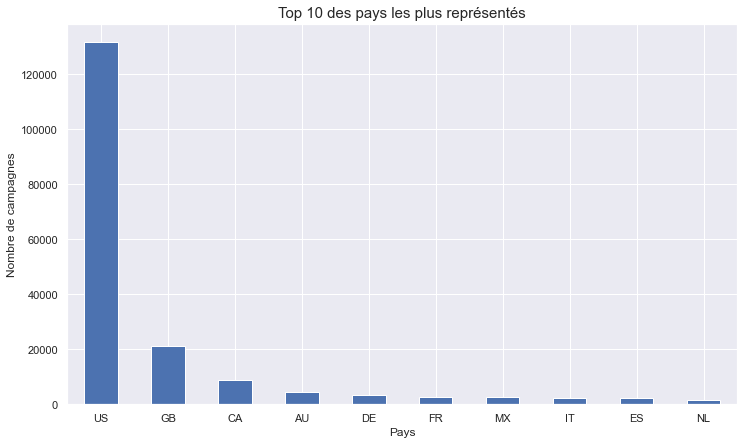

In [215]:
#Top 10 des pays les plus représentés

sns.set(style="darkgrid")
plt.figure(figsize=(12,7))

df.country.value_counts().head(10).plot.bar()

plt.xlabel('Pays')
plt.ylabel('Nombre de campagnes')
plt.xticks(rotation=0)

plt.title('Top 10 des pays les plus représentés', fontsize=15);

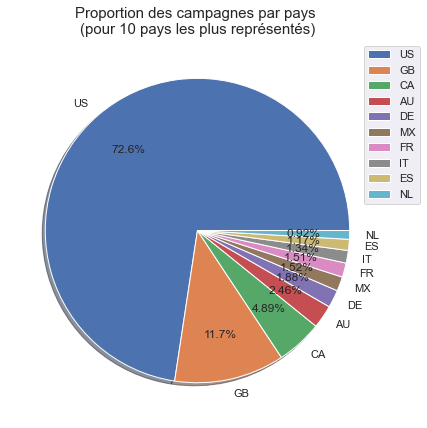

In [216]:
#Répartition des 10 pays les plus représentés

plt.figure(figsize=(10,7))

x=df_agg_pays['number_of_campaigns'].sort_values(ascending = False)
x=x.head(10)

cam=plt.pie(x, labels=['US','GB','CA','AU', 'DE','MX','FR','IT','ES','NL'],
               explode = [0, 0, 0, 0,0,0,0,0,0,0],
               labeldistance=1.1,
               autopct= lambda x: str(round(x, 2)) + '%',
               pctdistance = 0.7,shadow = True)

plt.title('Proportion des campagnes par pays \n(pour 10 pays les plus représentés)', fontsize=15)
plt.legend(bbox_to_anchor=(1.1,1));

In [217]:
#On souhaite calculer taux de réussite des campagnes dans les 10 pays les plus représentés

#Extraction des campagnes lancées dans les 10 premiers pays
df_temp_top10 = df.loc[df['country'].isin(list(df.country.value_counts().head(10).index))]

#Agrégation par pays
df_agg_pays_status = df_temp_top10.groupby(['country', 'status']).agg(Total_amount=('usd_pledged','sum'),                                                     
                                                           Number_of_campaigns=('id','count'))

df_affiche_country=pd.pivot_table(df_agg_pays_status,
                          values='Number_of_campaigns',
                          index=['country'],
                          columns=['status'], 
                          aggfunc=np.sum).reset_index()

#Ajout de la colonne 'success_rate'
df_affiche_country['success_rate']=round(df_affiche_country['successful']/(df_affiche_country['successful']+df_affiche_country['failed'])*100,1)
df_affiche_country=df_affiche_country.sort_values(by=['success_rate'], ascending=False)

df_affiche_country

status,country,failed,successful,success_rate
5,GB,8589,12663,59.6
9,US,57044,74804,56.7
4,FR,1298,1463,53.0
1,CA,4209,4669,52.6
0,AU,2308,2165,48.4
2,DE,1913,1494,43.9
3,ES,1221,911,42.7
8,NL,974,703,41.9
7,MX,1679,1066,38.8
6,IT,1678,753,31.0


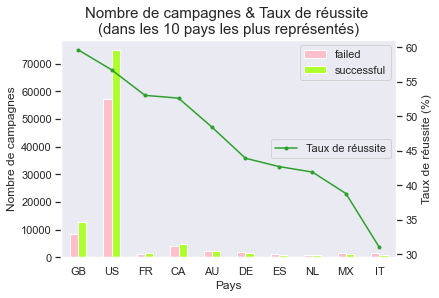

In [218]:
#Affichage du nombre de campagnes et du taux de réussite par pays

sns.set(style="dark")

#Définition des couleurs du graphique
colors = ['pink', 'greenyellow', 'tab:green']  #Définition des couleurs du graphique

#Affichage du graphique en barre
ax=df_affiche_country[['country','failed','successful']].plot(x='country', kind='bar', color=colors[0:2])

ax2 = plt.gca().twinx()

#Affichage de la courbe 'Taux de réussite'
ax2.plot(ax.get_xticks(),df_affiche_country[['success_rate']], linestyle='-',marker='.', color=colors[2], label='Taux de réussite')

#Axe des abcisses
ax.set_xlabel('Pays', fontsize=12)    
ax.tick_params(axis='x', rotation=0)    

#Axes des ordonnées
ax.tick_params(axis='y')
ax.set_ylabel('Nombre de campagnes', fontsize=12)  #Légende de l'axe des ordonnées sur la gauche
ax2.set_ylabel('Taux de réussite (%)', fontsize=12)  #Légende de l'axe des ordonnées sur la droite

#Légendes
ax.legend(loc="upper right")
ax2.legend(loc="center right")

#Titre
plt.title('Nombre de campagnes & Taux de réussite \n(dans les 10 pays les plus représentés)', fontsize=15);

In [219]:
#Distribution de la variable 'number_of_campaigns' (par pays)

df_agg_pays.describe()

,number_of_campaigns
count,25.000000
mean,7598.440000
std,26250.463071
min,3.000000
25%,492.000000
50%,847.000000
75%,2745.000000
max,131848.000000


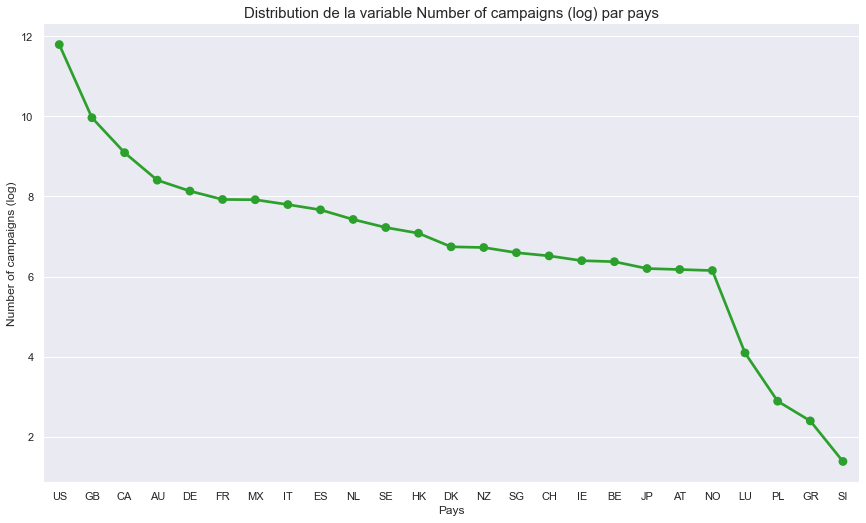

In [220]:
#La variable 'number_of_campaigns' a une distribution étendue (comprise entre 3 et 131848)
#On lui applique la fonction log (valeur logarithmique).
#Cela permettra d'afficher sur un même graphique le nombre de campagnes pour tous les pays.

df_agg_pays['number_of_campaigns_log'] = np.log1p(df_agg_pays['number_of_campaigns'])

#Affichage de la distribution de la variable 'number_of_campaigns_log' par pays 

sns.set(style="darkgrid")

sns.catplot(x='country', 
            y='number_of_campaigns_log', 
            kind='point', 
            data=df_agg_pays, 
            height=7, 
            aspect=12/7,
            color = 'tab:green')

plt.xlabel('Pays')
plt.ylabel('Number of campaigns (log)')

plt.title('Distribution de la variable Number of campaigns (log) par pays', fontsize=15);

#### Variable Spotlight ('spotlight')<a class="anchor" id="section_1_3_11"></a>

In [221]:
#Affichage des modalités de la variable 'spotlight' dans df

df['spotlight'].value_counts()

True     99325
False    82611
NC        8025
Name: spotlight, dtype: int64

In [222]:
#Extraction des campagnes pour lesquelles la variable 'spotlight' vaut True

df_spotlight_yes = df.loc[df['spotlight']==True]

#Décompte des modalités de la variable 'status' dans df_spotlight_yes

df_spotlight_yes['status'].value_counts()

successful    99325
Name: status, dtype: int64

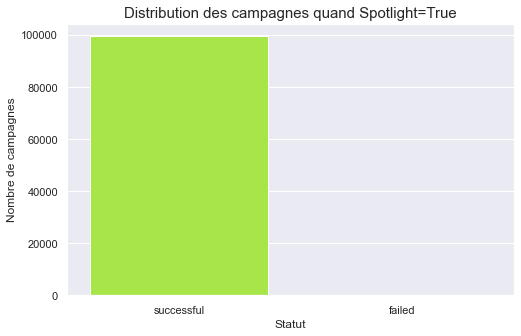

In [223]:
#Distribution de la variable 'status' quand 'Spotlight=True'

plt.figure(figsize=(8,5))

g=sns.countplot(x='status', data=df_spotlight_yes, order=df['status'].value_counts().index, palette=my_palette)

plt.xlabel('Statut')
plt.ylabel('Nombre de campagnes')
plt.yticks(np.arange(0, 120000, 20000))
plt.title ("Distribution des campagnes quand Spotlight=True", fontsize=15);

#Conclusion : on observe que toutes les campagnes pour lesquelles 'Spotlight=True' sont des campagnes qui ONT ATTEINT
#leur objectif (100% de campagnes réussies)

In [224]:
#Extraction des campagnes pour lesquelles la variable 'spotlight' vaut False

df_spotlight_no = df.loc[df['spotlight']==False]

#Décompte des modalités de la variable 'status' dans df_spotlight_no

df_spotlight_no['status'].value_counts()

failed    82611
Name: status, dtype: int64

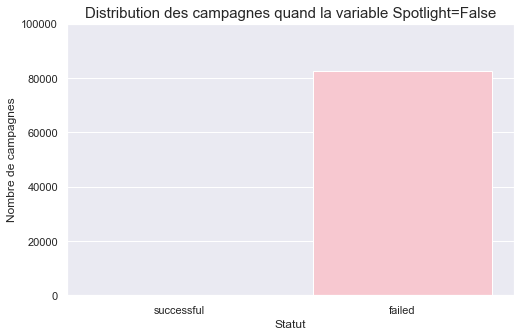

In [225]:
#Distribution de variable 'status' dans df_spotlight_no

plt.figure(figsize=(8,5))

g=sns.countplot(x='status', data=df_spotlight_no, order=df['status'].value_counts().index, palette=my_palette)

plt.xlabel('Statut')
plt.ylabel('Nombre de campagnes')
plt.yticks(np.arange(0, 120000, 20000))
plt.title ("Distribution des campagnes quand la variable Spotlight=False", fontsize=15);

#Conclusion : on observe que toutes les campagnes por lesquelles 'Spotlight=False' sont des campagnes qui N'ONT PAS ATTEINT 
#leur objectif (100% de campagnes échouées)

<u>**Conclusion (concernant la variable 'Spotlight' dans df) :**</u>

L'analyse de la **variable 'Spotlight'** nous permet de conclure que :<br>
 - **quand Spotlight = True : les campagnes atteignent systématiquement leur objectif (-> 100% de réussite),**<br>
 - **quand Spotlight = False : les campagnes n'atteignent jamais leur objectif (-> 100% d'échec).**<br>

Toutefois, il semble peu probable que la simple présence d'une vidéo de présentation sur le site internet de Kickstarter puisse conditionner de façon systématique la réussite d'une campagne (et ce quelles que soient les caractéristiques de cette campagne).<br>

On vérifie cela avec l'exemple de campagne suivant :<br>
  -  <u>id :</u> 1156737076<br>
  -  <u>name :</u> CardMKR - Create Your Own Custom PKMN Trading Cards!<br>
  -  <u>url :</u> https://www.kickstarter.com/projects/cardmkr/cardmkr-create-your-own-custom-pkmn-trading-cards?ref=discovery&term=CardMKR%20-%20Create%20Your%20Own%20Custom%20PKMN<br>

Cette campagne a échoué et pourtant elle dispose bien d'une vidéo de présentation sur le site Kickstarter 

En effectuant des recherches complémentaires, on comprend qu'en réalité, la variable Spotlight ne <u>**correspond pas à la présence d'une vidéo de présentation sur le site Kickstarter.**</u><br>

C’est un espace mis à disposition par Kickstarter et qui ne se destine qu'aux créateurs dont les projets ont été intégralement financés. Les créateurs des projets validés y partagent avec les contributeurs des nouvelles et actualités concernant l'évolution de leur projet) (https://help.kickstarter.com/hc/fr/articles/115005135834-Qu-est-ce-que-Spotlight-).

On comprend ainsi pourquoi les campagnes de financement réussies ont toutes pour modalité Spotlight = True tandis que celles échoues ont toute pour modalité Spotlight = False.<br>
De plus, on comprend désormais que 'Spotlight' est une variable connue à <u>postériori (c'est-à-dire quand les campagnes sont terminées).</u>

Au vu de ces observations, nous décidons de <u>retirer la variable Spotlight de notre dataset.</u>

Toutefois, **l'idée selon laquelle une vidéo de présentation pourrait avoir une influence sur le succès d'une campagne reste intéressante.**
Cette hypothèse sera donc exploitée ultérieurement (cf. Partie Itération 2).
L'accès à cette information (initialement non disponible dans notre dataset) se fera alors par webscraping sur le site https://www.kickstarter.com/


In [226]:
#On supprime dans df la variable 'spotlight' qui ne nous est plus utile

df = df.drop(['spotlight'], axis = 1)

In [227]:
df.shape

(189961, 23)